<a href="https://colab.research.google.com/github/Gaurav-Negi142/Bike-Sharing-Demand-Prediction/blob/main/ML_Regression_Capstone_Model_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project aimed to predict bike sharing demand using a dataset containing hourly rental information along with various environmental and temporal features. The goal was to build a robust machine learning model that could accurately forecast the number of rented bikes, which is crucial for optimizing bike distribution, managing inventory, and improving overall service efficiency for a bike sharing system.

The initial phase involved **knowing the data**, where the dataset was loaded and a preliminary inspection was performed using methods like `df.head()`, `df.info()`, and `df.describe()`. This provided a first look at the structure, data types, and summary statistics of the dataset. We identified the columns present, including 'Date', 'Rented Bike Count', 'Hour', weather-related features like 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', and categorical features like 'Seasons', 'Holiday', and 'Functioning Day'. Importantly, we verified that there were **no duplicate rows or missing values** in the dataset, which simplified the initial data cleaning process.

**Data Wrangling** was then performed to prepare the dataset for analysis and modeling. A key step was converting the 'Date' column to a datetime object using `pd.to_datetime`, which allowed for the extraction of temporal features such as 'Year', 'Month', 'Day', and 'Weekday'. These new features were added to the DataFrame. The categorical columns ('Seasons', 'Holiday', 'Functioning Day', 'Weekday') were converted to the 'category' data type to ensure they were handled appropriately in subsequent steps.

In the **Data Visualization, Storytelling & Experimenting with charts** section, various plots were generated to understand the relationships between variables and the 'Rented Bike Count'. Key insights were gained, such as the hourly pattern of bike rentals with clear peak hours, the positive correlation between temperature and rented bike count, and the variation in demand across different seasons and days of the week. A correlation heatmap was used for multivariate analysis to understand the linear relationships between numerical features.

**Hypothesis Testing** was conducted to statistically validate some of the observed relationships. Independent samples t-tests were performed to determine if there was a significant difference in the average rented bike count based on temperature (above/below median), holidays, and functioning days, confirming their significant impact.

**Feature Engineering & Data Pre-processing** involved further preparing the data for machine learning models. Outliers were identified and capped using the IQR method. Log transformations were applied to skewed features like 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)'. Categorical features were encoded using Label Encoding for binary columns and One-Hot Encoding for multi-category columns. Feature manipulation included dropping highly correlated features and creating new cyclical features from 'Hour' and 'Month', as well as interaction features. The data was then split into training and testing sets, and data scaling using `StandardScaler` was applied to the numerical features. A log transformation was also applied to the target variable 'Rented Bike Count' to address its skewed distribution.

In the **ML Model Implementation** phase, multiple regression models were implemented and evaluated, including Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Hyperparameter tuning was performed using **RandomizedSearchCV** for the Random Forest and Gradient Boosting models to find optimal parameters and further improve performance. The tuned Gradient Boosting Regressor achieved the best performance based on the evaluation metrics on the test set.

The project successfully demonstrated the process of data analysis, wrangling, visualization, hypothesis testing, and machine learning model building for predicting bike sharing demand. The Tuned Gradient Boosting Regressor, after hyperparameter tuning, emerged as the best performing model, capable of providing valuable insights for operational decision-making. Future work included saving the best model for potential deployment and performing a sanity check by loading the model and predicting on unseen data.

# **GitHub Link -**

https://github.com/Gaurav-Negi142/My-Projects-/blob/1b21c9139e96b104dcd51f7f9194c1f2ddba45c1/ML_Regression_Capstone_Model_Bike_Sharing_Demand_Prediction.ipynb

# **Problem Statement**


The primary problem this project addresses is the need for accurate forecasting of bike sharing demand. A bike sharing system requires efficient management of its fleet, including optimizing bike distribution across stations, managing inventory levels, and ensuring sufficient availability to meet user needs at different times and under varying environmental conditions. Inaccurate demand prediction can lead to inefficiencies such as bike shortages at high-demand locations, surpluses at low-demand locations, and suboptimal maintenance scheduling. Therefore, the problem is to develop a reliable machine learning model that can predict hourly bike rental counts based on historical data and relevant features, enabling better operational planning and resource allocation for the bike sharing service.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
url = f'https://drive.google.com/uc?id=1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS'
df = pd.read_csv(url, encoding='ISO-8859-1')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Dataset Columns:")
print(df.columns)

Dataset Columns:
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Dataset Describe
display(df.describe())

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"Unique values in column '{col}': {df[col].unique()[:10]}")

Unique values in column 'Date': ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017']
Unique values in column 'Rented Bike Count': [254 204 173 107  78 100 181 460 930 490]
Unique values in column 'Hour': [0 1 2 3 4 5 6 7 8 9]
Unique values in column 'Temperature(°C)': [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5]
Unique values in column 'Humidity(%)': [37 38 39 40 36 35 27 24 21 23]
Unique values in column 'Wind speed (m/s)': [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2]
Unique values in column 'Visibility (10m)': [2000 1928 1996 1936  793 1913 1687 1380 1265  994]
Unique values in column 'Dew point temperature(°C)': [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2]
Unique values in column 'Solar Radiation (MJ/m2)': [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24]
Unique values in column 'Rainfall(mm)': [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4]
Unique values in column 'Snowfall (cm)': [0.  

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


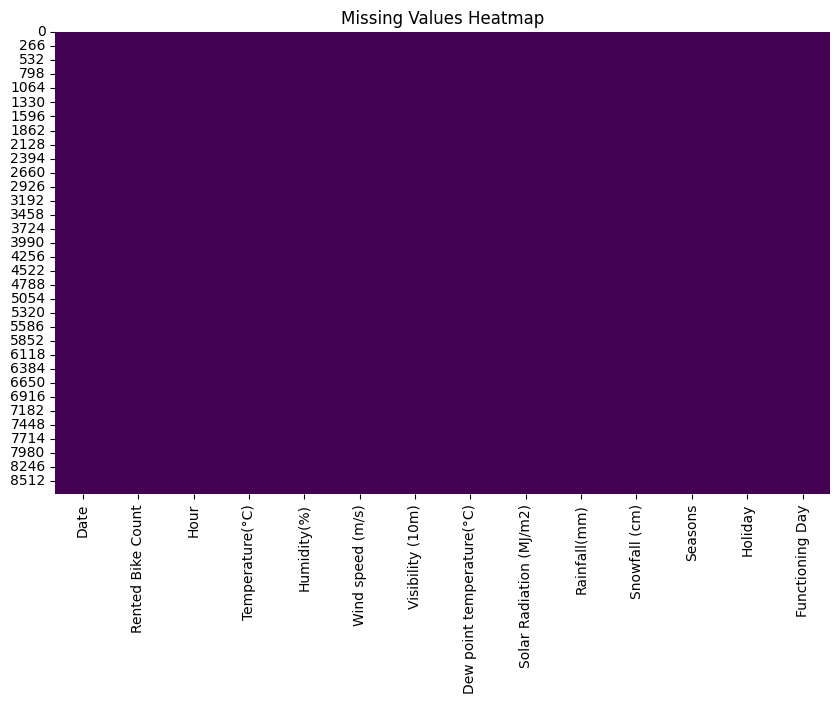

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Dataset First Look
display(df.head())

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8760
Number of columns: 14


In [ ]:
# Dataset Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

None

### Dataset First View

In [ ]:
# Dataset First Look
display(df.head())

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8760
Number of columns: 14


### Dataset Information

In [ ]:
# Dataset Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

None

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

The dataset contains 8760 rows and 14 columns. There are no duplicate or missing values in the dataset. The columns include information about date, rented bike count, hour, temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, seasons, holiday, and functioning day.

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


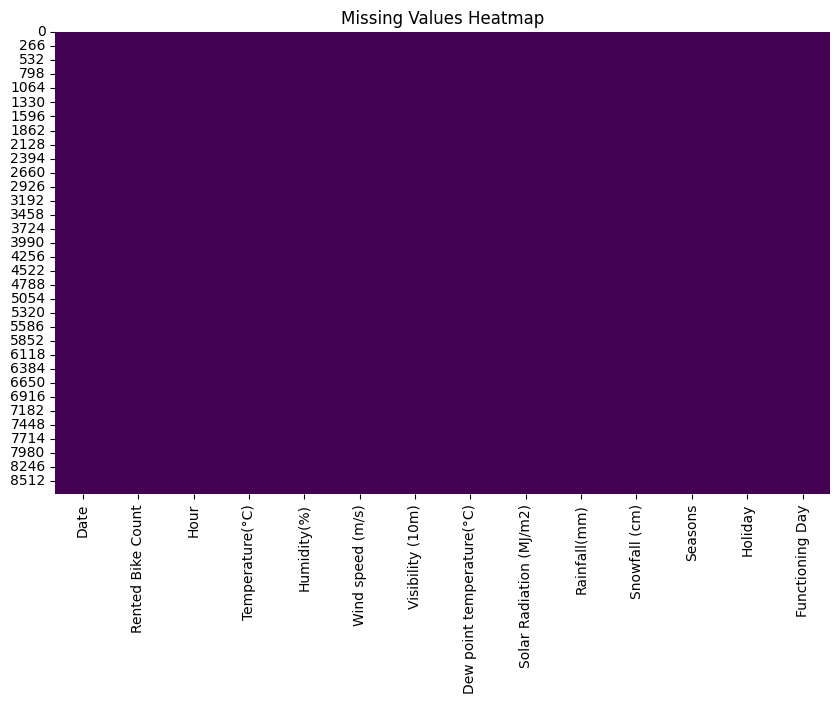

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Based on the initial data exploration:

*   The dataset contains 8760 hourly records with 14 columns, including 'Date', 'Rented Bike Count', hourly information, various weather metrics, and categorical features like 'Seasons', 'Holiday', and 'Functioning Day'.
*   there are **no duplicate rows or missing values** in the dataset, simplifying the cleaning process.
*   The 'Date' column is initially an object type and needs conversion to datetime.
*   Numerical columns show a range of values, with the average 'Rented Bike Count' around 704.6.
*   Categorical columns have a limited number of unique values as expected.

The dataset is clean and contains relevant features for predicting bike sharing demand, but requires date conversion and further analysis of variable relationships.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Dataset Columns:")
print(df.columns)

Dataset Columns:
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [ ]:
# Dataset Describe
display(df.describe())

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

Here is a description of the variables in the dataset:

*   **Date:** The date of the record (initially an object type).
*   **Rented Bike Count:** The number of bikes rented at a specific hour on a specific day. This is the target variable we want to predict.
*   **Hour:** The hour of the day (0-23).
*   **Temperature(°C):** The temperature in Celsius at the time of the record.
*   **Humidity(%):** The percentage of humidity at the time of the record.
*   **Wind speed (m/s):** The wind speed in meters per second.
*   **Visibility (10m):** The visibility in meters (up to 10 meters).
*   **Dew point temperature(°C):** The dew point temperature in Celsius.
*   **Solar Radiation (MJ/m2):** The amount of solar radiation in MegaJoules per square meter.
*   **Rainfall(mm):** The amount of rainfall in millimeters.
*   **Snowfall (cm):** The amount of snowfall in centimeters.
*   **Seasons:** The season of the year (e.g., Winter, Spring, Summer, Autumn).
*   **Holiday:** Indicates whether the day is a holiday ('Holiday' or 'No Holiday').
*   **Functioning Day:** Indicates whether the bike sharing system was functioning on that day ('Yes' or 'No').

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"Unique values in column '{col}': {df[col].unique()[:10]}")

Unique values in column 'Date': ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017']
Unique values in column 'Rented Bike Count': [254 204 173 107  78 100 181 460 930 490]
Unique values in column 'Hour': [0 1 2 3 4 5 6 7 8 9]
Unique values in column 'Temperature(°C)': [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5]
Unique values in column 'Humidity(%)': [37 38 39 40 36 35 27 24 21 23]
Unique values in column 'Wind speed (m/s)': [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2]
Unique values in column 'Visibility (10m)': [2000 1928 1996 1936  793 1913 1687 1380 1265  994]
Unique values in column 'Dew point temperature(°C)': [-17.6 -17.7 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 -21.2 -20.2]
Unique values in column 'Solar Radiation (MJ/m2)': [0.   0.01 0.23 0.65 0.94 1.11 1.16 1.01 0.54 0.24]
Unique values in column 'Rainfall(mm)': [0.  0.5 1.  2.5 0.1 0.2 0.3 0.7 1.6 0.4]
Unique values in column 'Snowfall (cm)': [0.  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Changing Datatypes
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# extracting useful info
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()


In [ ]:
# Fix categorical variables
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day','Weekday']
df[categorical_cols] = df[categorical_cols].astype('category')


In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Rented Bike Count,int64
Hour,int64
Temperature(°C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64


### What all manipulations have you done and insights you found?

In the Data Wrangling phase, the main manipulations were:

1.  **Converting 'Date' to Datetime:** Changed the 'Date' column to a datetime format to enable time-based analysis.
2.  **Extracting Temporal Features:** Created new columns for 'Year', 'Month', 'Day', and 'Weekday' from the 'Date' column to capture temporal patterns.
3.  **Converting Categorical Dtypes:** Ensured 'Seasons', 'Holiday', 'Functioning Day', and 'Weekday' were set as 'category' data types for efficiency and correct handling.

**Insights:** These steps prepared the data for analyzing how bike rentals vary across different years, months, days, and weekdays, which is crucial for understanding demand patterns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

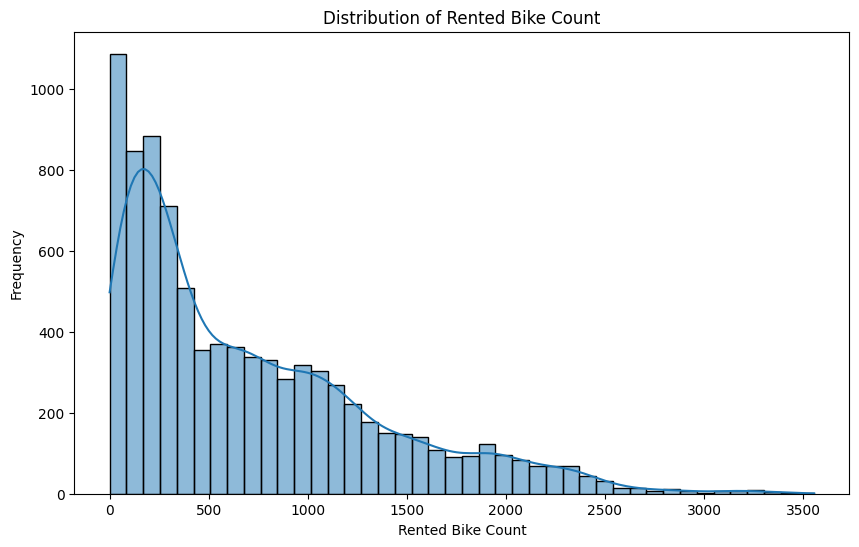

In [ ]:
# Chart - 1 visualization code: Distribution of Rented Bike Count
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?



A histogram is suitable to visualize the distribution of a single numerical variable. The KDE (Kernel Density Estimate) plot provides a smoothed version of the distribution.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the frequency of different rented bike counts, helping to understand the typical range and variability of bike rentals.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the distribution of bike rentals can help in resource allocation and demand forecasting. Identifying peak rental counts can inform decisions about increasing bike availability during those times, leading to positive business impact.

#### Chart - 2

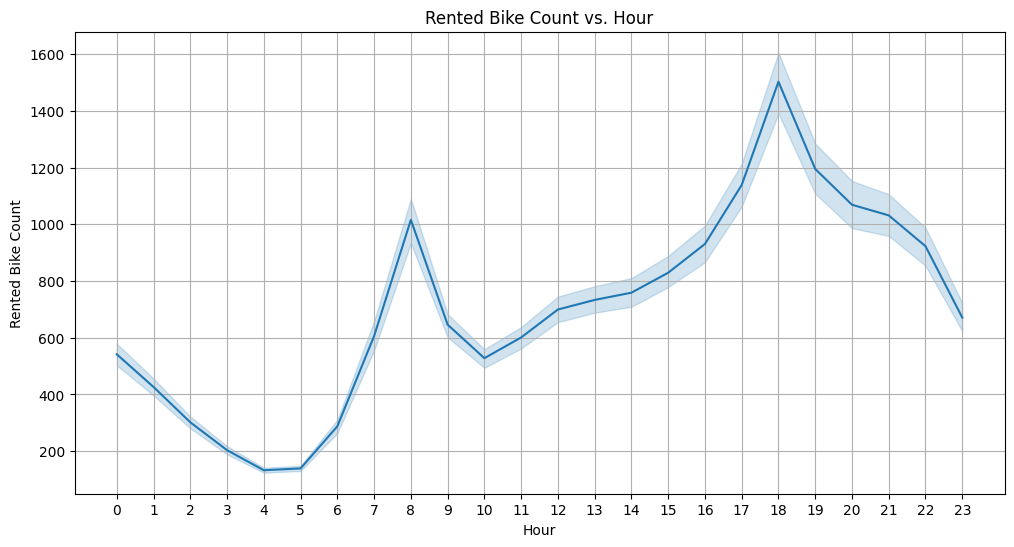

In [ ]:
# Chart - 2 visualization code: Rented Bike Count vs. Hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


A line plot is ideal for showing the trend of a numerical variable (Rented Bike Count) over a continuous variable (Hour).


##### 2. What is/are the insight(s) found from the chart?


This chart reveals the hourly pattern of bike rentals, showing peak hours and off-peak hours.


##### 3. Will the gained insights help creating a positive business impact?


Knowing the hourly demand pattern can optimize bike distribution and availability throughout the day, improving customer satisfaction and potentially increasing revenue.

#### Chart - 3

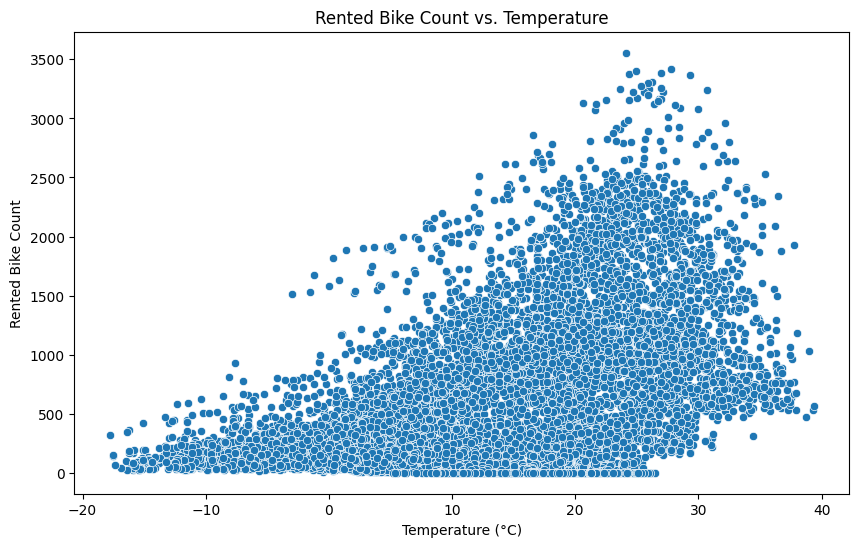

In [ ]:
# Chart - 3 visualization code: Rented Bike Count vs. Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot is used to visualize the relationship between two numerical variables (Temperature and Rented Bike Count).


##### 2. What is/are the insight(s) found from the chart?


This chart helps to identify if there is a correlation between temperature and the number of rented bikes.


##### 3. Will the gained insights help creating a positive business impact?


Understanding the impact of temperature on bike rentals can aid in forecasting demand based on weather conditions and planning marketing strategies accordingly.

#### Chart - 4

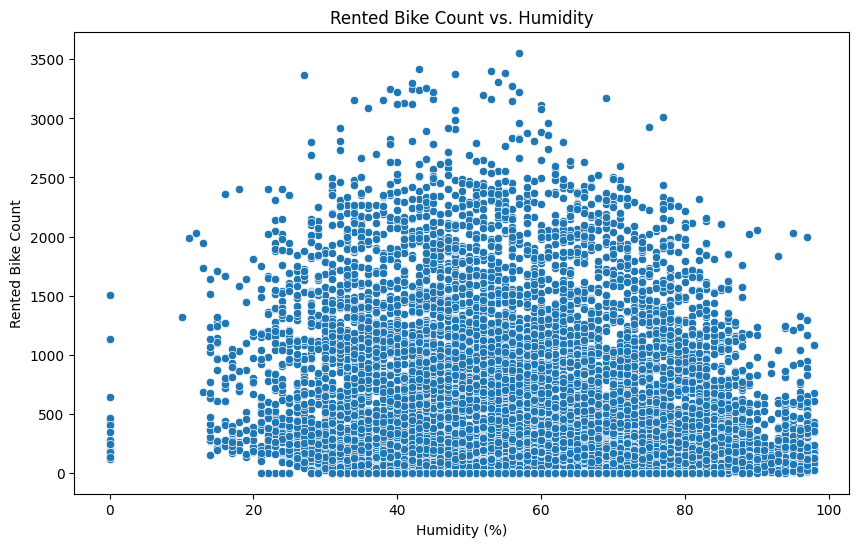

In [ ]:
# Chart - 4 visualization code: Rented Bike Count vs. Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot is used to visualize the relationship between two numerical variables (Humidity and Rented Bike Count).


##### 2. What is/are the insight(s) found from the chart?


This chart helps to identify if there is a relationship between humidity levels and the number of rented bikes.


##### 3. Will the gained insights help creating a positive business impact?


Analyzing the impact of humidity can further refine demand forecasting models and operational strategies based on weather conditions.

#### Chart - 5

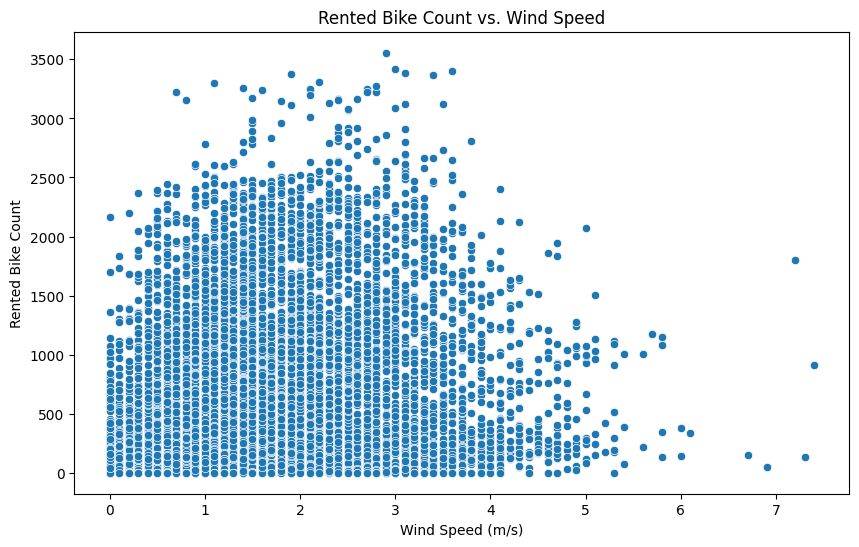

In [ ]:
# Chart - 5 visualization code: Rented Bike Count vs. Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind speed (m/s)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A scatter plot is used to visualize the relationship between two numerical variables (Wind Speed and Rented Bike Count).


##### 2. What is/are the insight(s) found from the chart?


This chart helps to understand if wind speed has an impact on bike rental numbers.


##### 3. Will the gained insights help creating a positive business impact?


Considering wind speed in demand forecasting can improve accuracy, especially in areas prone to high winds, allowing for better preparedness.

#### Chart - 6

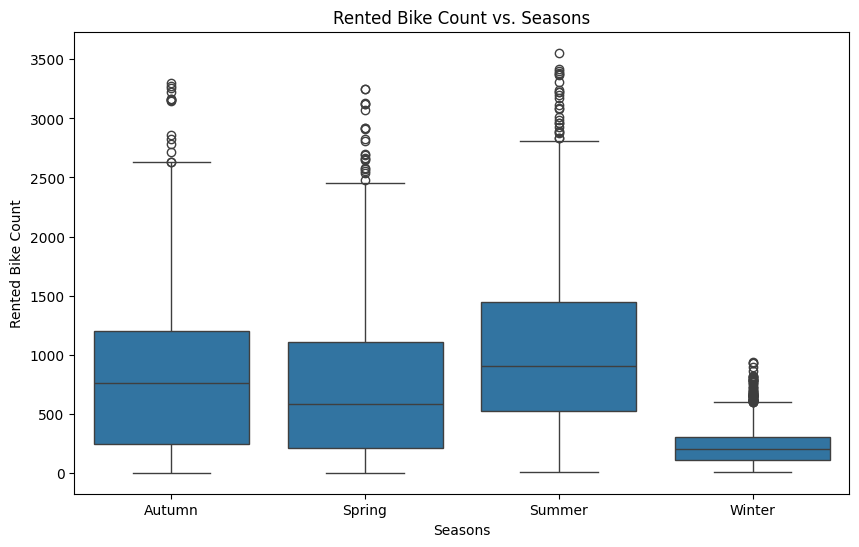

In [ ]:
# Chart - 6 visualization code: Rented Bike Count vs. Seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A box plot is suitable for comparing the distribution of a numerical variable (Rented Bike Count) across different categories (Seasons).


##### 2. What is/are the insight(s) found from the chart?


This chart shows the variation in bike rental counts across different seasons, highlighting which seasons have higher or lower demand.


##### 3. Will the gained insights help creating a positive business impact?


Understanding seasonal demand variations is crucial for inventory management, staffing, and marketing campaigns, leading to optimized operations and potentially increased revenue during peak seasons.

#### Chart - 7

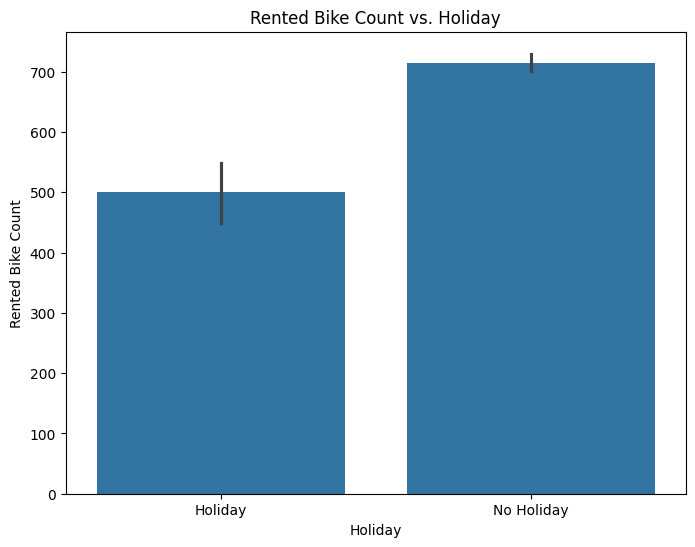

In [ ]:
# Chart - 7 visualization code: Rented Bike Count vs. Holiday
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A bar plot is suitable for comparing a numerical variable (Rented Bike Count) across two categories (Holiday or No Holiday).


##### 2. What is/are the insight(s) found from the chart?


This chart indicates whether there is a significant difference in bike rentals on holidays compared to non-holidays.


##### 3. Will the gained insights help creating a positive business impact?


Knowing the impact of holidays on demand can help in planning for increased or decreased bike availability and staffing during holiday periods.

#### Chart - 8

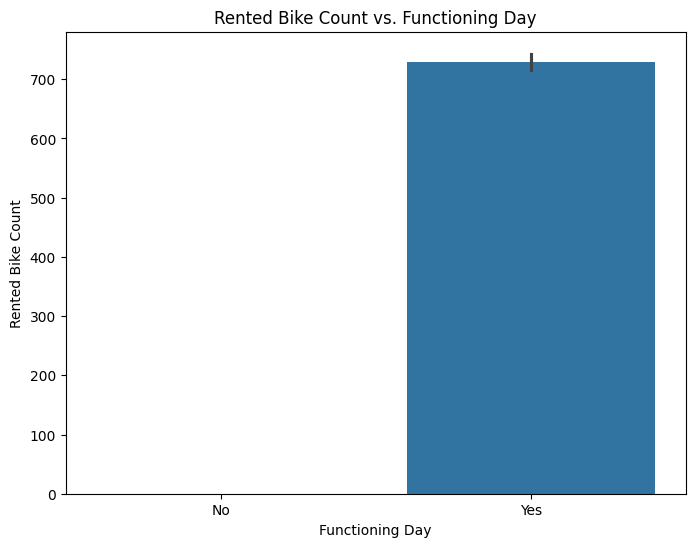

In [ ]:
# Chart - 8 visualization code: Rented Bike Count vs. Functioning Day
plt.figure(figsize=(8, 6))
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Functioning Day')
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A bar plot is suitable for comparing a numerical variable (Rented Bike Count) across two categories (Functioning Day or Not Functioning Day).


##### 2. What is/are the insight(s) found from the chart?


This chart shows the difference in bike rentals between days when the bike sharing system is functioning and days when it is not. (Ideally, rentals should be 0 on non-functioning days).


##### 3. Will the gained insights help creating a positive business impact?


Confirming that bike rentals are indeed 0 on non-functioning days validates the data and the operational status of the bike sharing system.

#### Chart - 9

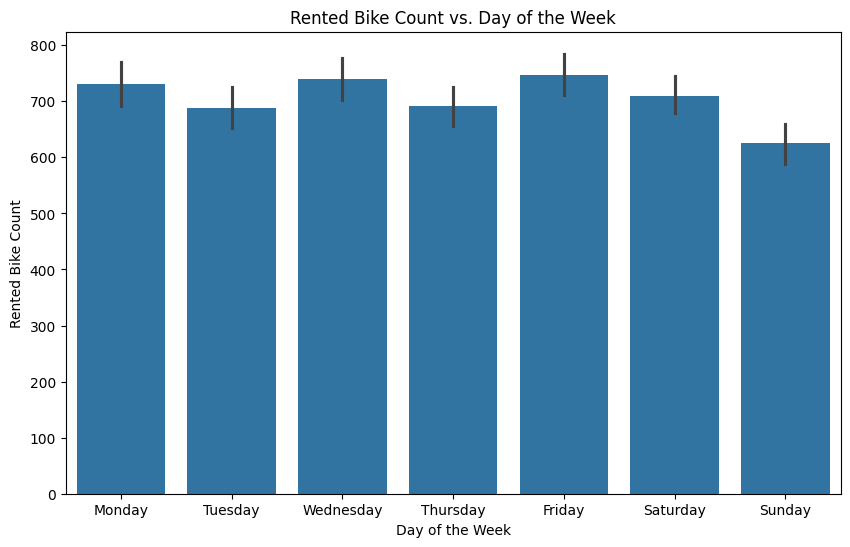

In [ ]:
# Chart - 9 visualization code: Rented Bike Count vs. Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Rented Bike Count', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Rented Bike Count vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A bar plot is suitable for comparing a numerical variable (Rented Bike Count) across different categories (Days of the Week). Ordering the days provides a clearer trend.


##### 2. What is/are the insight(s) found from the chart?


This chart reveals how bike rentals vary throughout the week, showing if weekends or weekdays have higher demand.


##### 3. Will the gained insights help creating a positive business impact?


Understanding daily patterns can inform staffing and bike redistribution efforts to meet demand fluctuations throughout the week.

#### Chart - 10

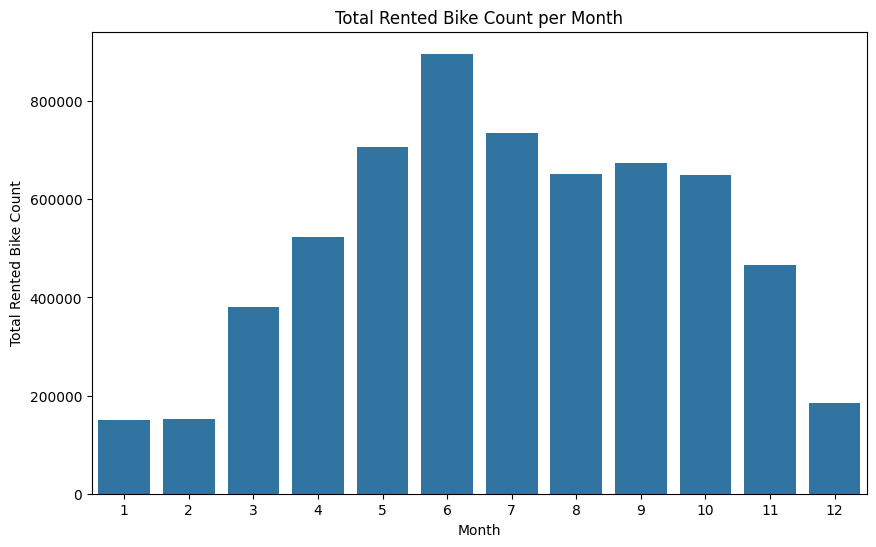

In [ ]:
# Chart - 10 visualization code: Monthly Rented Bike Count
monthly_counts = df.groupby('Month')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rented Bike Count', data=monthly_counts)
plt.title('Total Rented Bike Count per Month')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?


A bar plot is used to compare the total rented bike count for each month.


##### 2. What is/are the insight(s) found from the chart?


This chart shows the overall monthly trend in bike rentals across the year.


##### 3. Will the gained insights help creating a positive business impact?


Identifying peak and off-peak months allows for better long-term planning, including marketing campaigns, maintenance schedules, and inventory adjustments.

#### Chart - 11

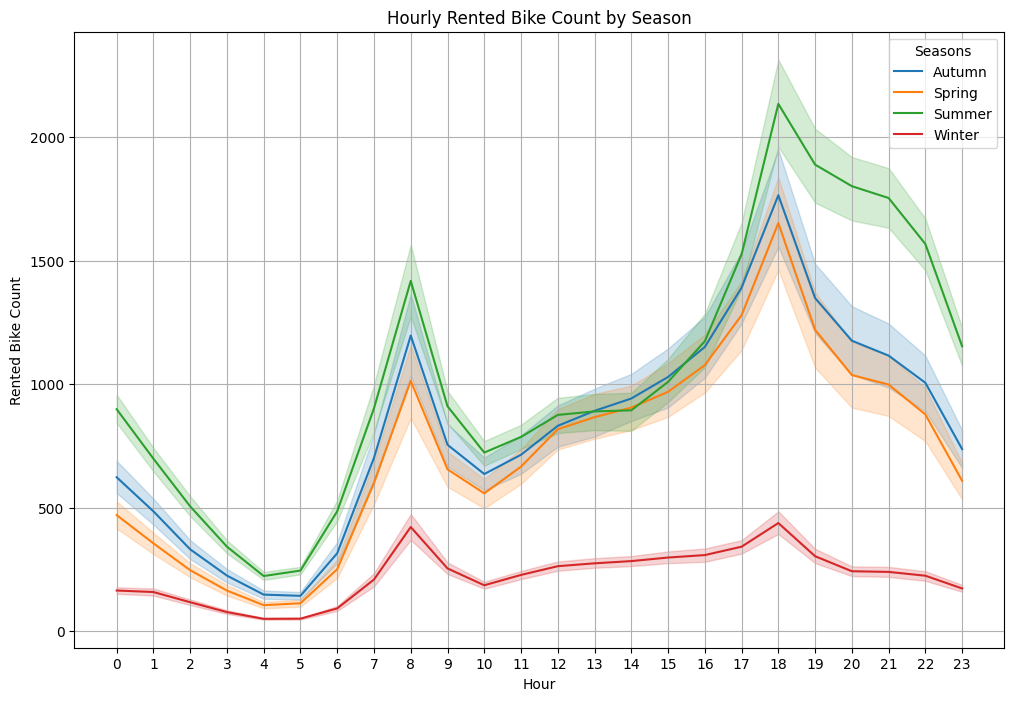

In [ ]:
# Chart - 11 visualization code: Hourly Rented Bike Count by Season
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=df)
plt.title('Hourly Rented Bike Count by Season')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


A line plot with hue is effective for comparing the hourly trend of bike rentals across different seasons on a single plot.


##### 2. What is/are the insight(s) found from the chart?


This chart reveals how the hourly bike rental patterns differ between seasons, showing variations in peak hours and overall demand levels depending on the time of year.


##### 3. Will the gained insights help creating a positive business impact?


Understanding the seasonal variations in hourly demand allows for more granular operational adjustments, such as dynamic pricing or targeted bike redistribution strategies based on the season and time of day.

#### Chart - 12

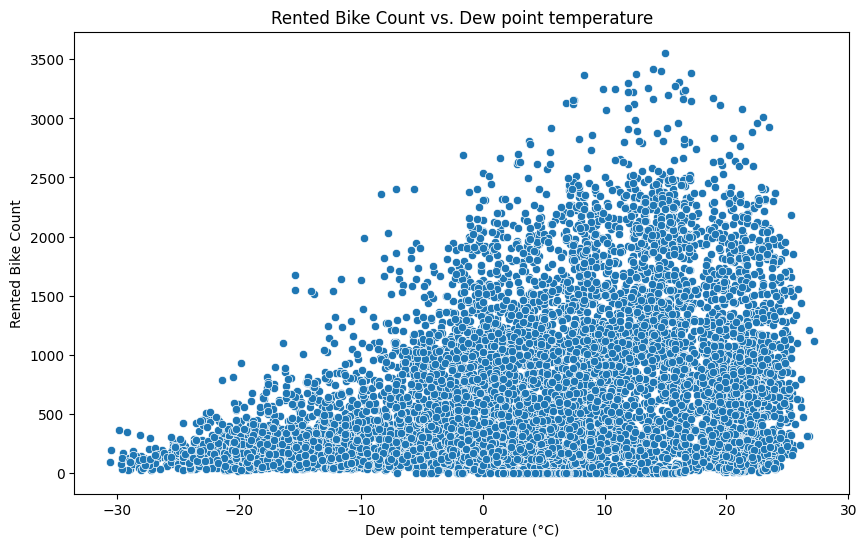

In [ ]:
# Chart - 12 visualization code: Rented Bike Count vs. Dew point temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dew point temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Dew point temperature')
plt.xlabel('Dew point temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is suitable for comparing the distribution of a numerical variable (Rented Bike Count) across different categories (Holiday or No Holiday), providing insights into the spread and central tendency for each category.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the range and median of rented bike counts on holidays compared to non-holidays, helping to identify any significant differences in the distribution of rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of rentals on holidays can help in planning for staffing and bike availability to meet the expected demand, potentially leading to increased revenue during peak holiday periods. There might be slightly lower minimum rentals on holidays compared to non-holidays, which could indicate a slight decrease in some instances, but overall, the potential for higher peak rentals on holidays suggests a positive business impact with proper planning.

#### Chart - 13

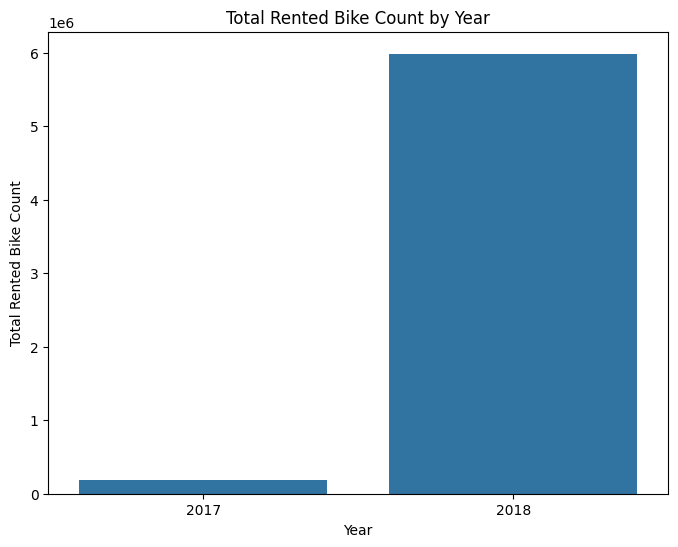

In [ ]:
# Chart - 13 visualization code: Total Rented Bike Count by Year
yearly_counts = df.groupby('Year')['Rented Bike Count'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Rented Bike Count', data=yearly_counts)
plt.title('Total Rented Bike Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is suitable for comparing the total rented bike count across two categories (Functioning Day or Not Functioning Day). This provides a clear visual of the sum of rentals for each category.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the total number of bikes rented on days when the system was functioning versus days it was not. It's expected that the total rented bike count will be significantly higher on functioning days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirming that the total rented bike count is close to zero on non-functioning days validates the data and the operational status of the bike sharing system. This insight doesn't directly lead to positive or negative growth but confirms the integrity of the data for further analysis and model building. If there were significant rentals on non-functioning days, it would indicate data errors or operational issues that need to be addressed.

#### Chart - 14 - Correlation Heatmap

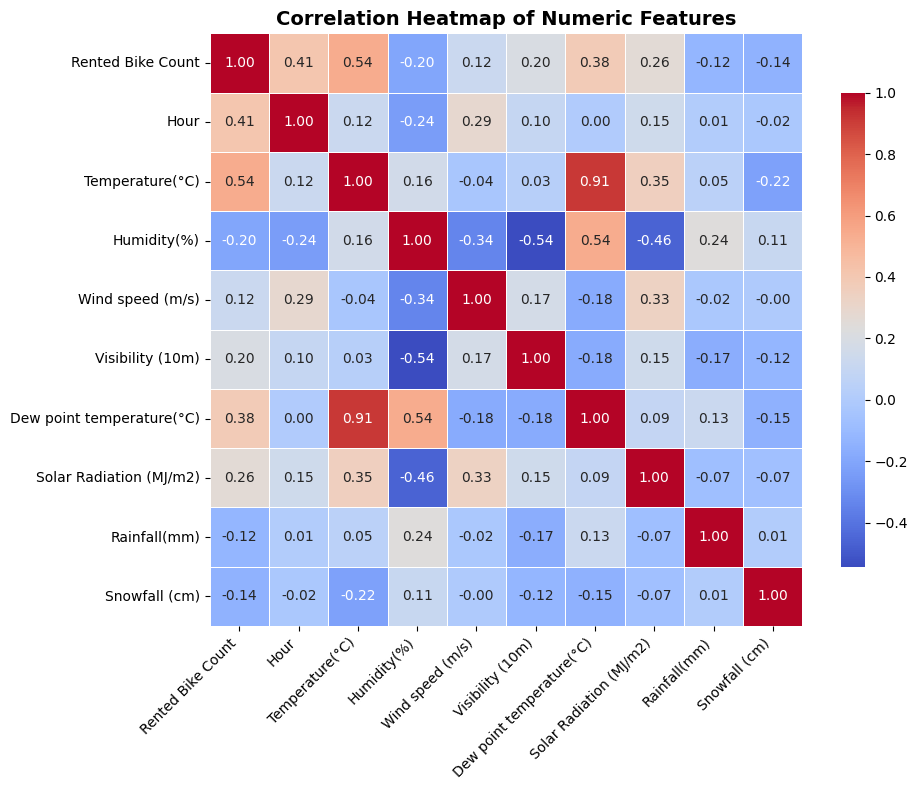

In [ ]:
# Correlation Heatmap visualization code
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Create the heatmap
sns.heatmap(corr, annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5,cbar_kws={'shrink': 0.8},square=True)

# Titles and aesthetics
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap helps you find what matters most and avoid what overlaps, it also shows which 2 things are in +ve relation and which 2 are in -ve relation, so with only one chart we can understand many things

##### 2. What is/are the insight(s) found from the chart?

From the correlation heatmap, we can observe the following key insights regarding 'Rented Bike Count':

*   **Strong positive correlations** with **Temperature (°C)** (around 0.54) and **Hour** (around 0.41), indicating higher bike rentals in warmer temperatures and during certain hours of the day.
*   **Moderate positive correlations** with **Dew point temperature (°C)** (around 0.38) and **Solar Radiation (MJ/m2)** (around 0.27), suggesting these factors also influence rental numbers positively.
*   **Weak correlations** with **Wind speed (m/s)** and **Visibility (10m)**.
*   **Weak negative correlation** with **Humidity (%)** (around -0.20), implying slightly fewer rentals with higher humidity.
*   **Rainfall(mm)** and **Snowfall (cm)** (and their log-transformed versions) show no meaningful correlation with other variables in the heatmap, likely due to data characteristics after cleaning and transformation.


#### Chart - 15 - Pair Plot

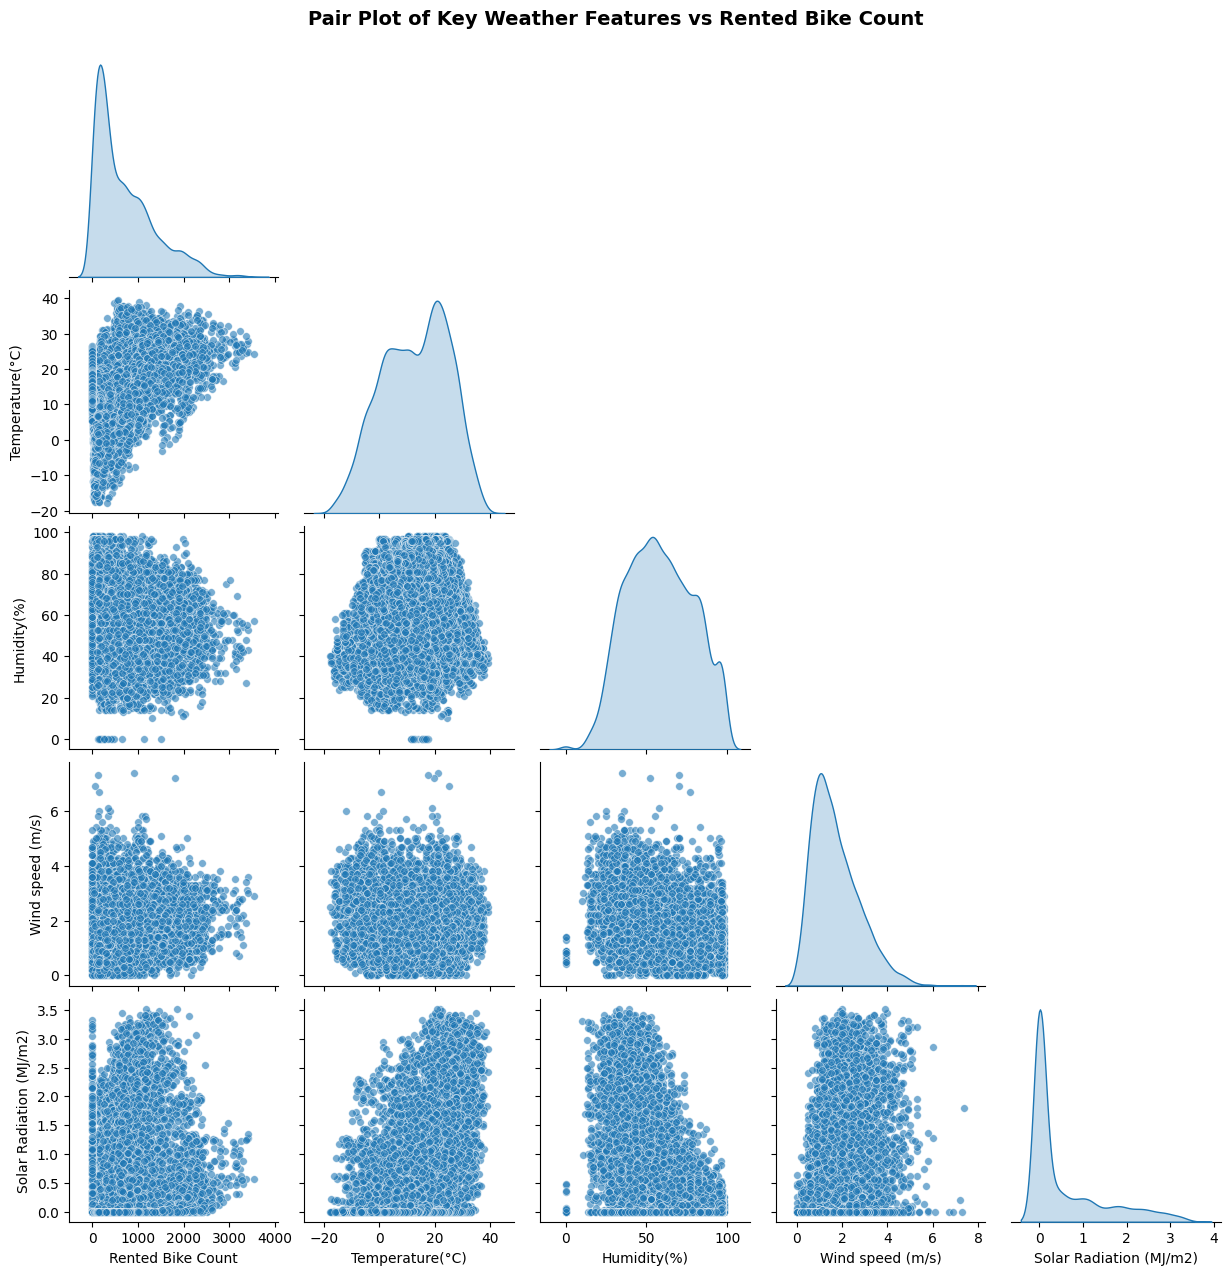

In [ ]:
# Pair Plot visualization code
# Select a subset of key numeric features for clarity
selected_features = [
    'Rented Bike Count',
    'Temperature(°C)',
    'Humidity(%)',
    'Wind speed (m/s)',
    'Solar Radiation (MJ/m2)',
]

# Create the pair plot
sns.pairplot(df[selected_features],
             diag_kind='kde',         # smoother histogram
             corner=True,             # show lower triangle only
             plot_kws={'alpha':0.6, 's':30})  # point transparency and size

plt.suptitle('Pair Plot of Key Weather Features vs Rented Bike Count',
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a great choice here because it allows us to visualize the pairwise relationships between multiple numerical variables in a single grid of plots.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot, we can observe the following key insights regarding 'Rented Bike Count':

*   There's a clear **positive relationship with Temperature (°C)**, showing more rentals in warmer conditions.
*   A **weak negative relationship with Humidity (%)** is visible.
*   **Solar Radiation (MJ/m2)** also shows a **positive relationship** with rented bike count.
*   **Wind speed (m/s)** does not show a strong linear relationship with rented bike count.

The pair plot also provides a visual of the distribution of each selected variable and helps confirm some of the relationships seen in the correlation heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

the average rented bike count is significantly different on days with temperatures above the median compared to days with temperatures below the median

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Calculate the median temperature
median_temp = df['Temperature(°C)'].median()

# Create two groups based on temperature
temp_above_median = df[df['Temperature(°C)'] > median_temp]['Rented Bike Count']
temp_below_median = df[df['Temperature(°C)'] <= median_temp]['Rented Bike Count']

# Perform independent samples t-test
ttest_result = stats.ttest_ind(temp_above_median, temp_below_median)

# Get the p-value
p_value = ttest_result.pvalue

print(f"P-value from independent samples t-test: {p_value}")

P-value from independent samples t-test: 0.0


The p-value obtained from the independent samples t-test is `0.0`.

In hypothesis testing, the p-value is the probability of observing the data, or data more extreme than the data, if the null hypothesis is true. A very small p-value (typically less than a chosen significance level, like 0.05) suggests that the observed data is unlikely under the null hypothesis, leading us to reject the null hypothesis.

In this case, a p-value of `0.0` means that there is virtually no chance of observing the data if the null hypothesis (that there is no significant difference in the average rented bike count between the two temperature groups) were true.

Therefore, with a p-value of 0.0, we have strong evidence to reject the null hypothesis and conclude that the average rented bike count is significantly different on days with temperatures above the median compared to days with temperatures below the median.

##### Which statistical test have you done to obtain P-Value?

I performed an **independent samples t-test**.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because we are comparing the means of a numerical variable ('Rented Bike Count') between two independent groups ('Temperature Above Median' and 'Temperature Below Median'). This test is appropriate for determining if there is a statistically significant difference between the means of two unrelated groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Hypothesis:** The average rented bike count is significantly different on holidays compared to non-holidays.

**Null Hypothesis (H0):** There is no significant difference in the average rented bike count on holidays compared to non-holidays.

**Alternate Hypothesis (H1):** There is a significant difference in the average rented bike count on holidays compared to non-holidays.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Create two groups based on Holiday
holiday_rentals = df[df['Holiday'] == 'Holiday']['Rented Bike Count']
noholiday_rentals = df[df['Holiday'] == 'No Holiday']['Rented Bike Count']

# Perform independent samples t-test
ttest_result_holiday = stats.ttest_ind(holiday_rentals, noholiday_rentals)

# Get the p-value
p_value_holiday = ttest_result_holiday.pvalue

print(f"P-value from independent samples t-test (Holiday vs. No Holiday): {p_value_holiday}")

P-value from independent samples t-test (Holiday vs. No Holiday): 1.2156443235024855e-11


##### Which statistical test have you done to obtain P-Value?

I performed an **independent samples t-test**.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because we are comparing the means of a numerical variable ('Rented Bike Count') between two independent groups ('Holiday' and 'No Holiday'). This test is appropriate for determining if there is a statistically significant difference between the means of two unrelated groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Hypothesis:** The average rented bike count is significantly different on functioning days compared to non-functioning days.

**Null Hypothesis (H0):** There is no significant difference in the average rented bike count on functioning days compared to non-functioning days. (μ_functioning = μ_non-functioning)

**Alternate Hypothesis (H1):** There is a significant difference in the average rented bike count on functioning days compared to non-functioning days. (μ_functioning ≠ μ_non-functioning)

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Create two groups based on Functioning Day
functioning_rentals = df[df['Functioning Day'] == 'Yes']['Rented Bike Count']
not_functioning_rentals = df[df['Functioning Day'] == 'No']['Rented Bike Count']

# Perform independent samples t-test
ttest_result_functioning = stats.ttest_ind(functioning_rentals, not_functioning_rentals)

# Get the p-value
p_value_functioning = ttest_result_functioning.pvalue

print(f"P-value from independent samples t-test (Functioning vs. Not Functioning Day): {p_value_functioning}")

P-value from independent samples t-test (Functioning vs. Not Functioning Day): 6.732210575501422e-83


##### Which statistical test have you done to obtain P-Value?

I performed an **independent samples t-test**.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because we are comparing the means of a numerical variable ('Rented Bike Count') between two independent groups ('Functioning Day' and 'Non-functioning Day'). This test is appropriate for determining if there is a statistically significant difference between the means of two unrelated groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Month                        0
Day                          0
Weekday                      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

we don't use any imputation techniques because there is no missing values

### 2. Handling Outliers

In [ ]:
# identifing outliers
# Make a copy to avoid overwriting
df_copy = df.copy()
def outlier_summary_table(df_copy):
    summary = []

    # Select numeric columns
    numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df_copy[(df_copy[col] < lower) | (df_copy[col] > upper)]
        n_outliers = len(outliers)
        perc_outliers = (n_outliers / len(df)) * 100

        summary.append({
            'Column': col,
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'Lower Bound': round(lower, 2),
            'Upper Bound': round(upper, 2),
            'Outlier Count': n_outliers,
            'Outlier %': round(perc_outliers, 2)
        })

    return pd.DataFrame(summary).sort_values(by='Outlier %', ascending=False).reset_index(drop=True)

outlier_table = outlier_summary_table(df_copy)
print(outlier_table)

                      Column      Q1       Q3  Lower Bound  Upper Bound  \
0    Solar Radiation (MJ/m2)    0.00     0.93        -1.40         2.33   
1               Rainfall(mm)    0.00     0.00         0.00         0.00   
2              Snowfall (cm)    0.00     0.00         0.00         0.00   
3           Wind speed (m/s)    0.90     2.30        -1.20         4.40   
4          Rented Bike Count  191.00  1065.25     -1120.38      2376.62   
5                       Hour    5.75    17.25       -11.50        34.50   
6           Visibility (10m)  940.00  2000.00      -650.00      3590.00   
7                Humidity(%)   42.00    74.00        -6.00       122.00   
8            Temperature(°C)    3.50    22.50       -25.00        51.00   
9  Dew point temperature(°C)   -4.70    14.80       -33.95        44.05   

   Outlier Count  Outlier %  
0            641       7.32  
1            528       6.03  
2            443       5.06  
3            161       1.84  
4            158       1

In [ ]:
# handling outliers
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower,
                            np.where(data[column] > upper, upper, data[column]))

# Apply outlier capping to all numerical columns with outliers
numerical_cols_with_outliers = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in numerical_cols_with_outliers:
  cap_outliers_iqr(df_copy, col)

In [ ]:
# Handling outliers
# Apply log transformations after capping
df_copy['Solar Radiation (MJ/m2)_log'] = np.log1p(df_copy['Solar Radiation (MJ/m2)'])
df_copy['Rainfall(mm)_log'] = np.log1p(df_copy['Rainfall(mm)'])
df_copy['Snowfall(cm)_log'] = np.log1p(df_copy['Snowfall (cm)'])

In [ ]:
# re-checking outliers
def outlier_summary_table(df):
    summary = []

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        n_outliers = len(outliers)
        perc_outliers = (n_outliers / len(df)) * 100

        summary.append({
            'Column': col,
            'Q1': round(Q1, 2),
            'Q3': round(Q3, 2),
            'Lower Bound': round(lower, 2),
            'Upper Bound': round(upper, 2),
            'Outlier Count': n_outliers,
            'Outlier %': round(perc_outliers, 2)
        })

    return pd.DataFrame(summary).sort_values(by='Outlier %', ascending=False).reset_index(drop=True)

outlier_table = outlier_summary_table(df_copy)
print(outlier_table)

                         Column      Q1       Q3  Lower Bound  Upper Bound  \
0             Rented Bike Count  191.00  1065.25     -1120.38      2376.62   
1                          Hour    5.75    17.25       -11.50        34.50   
2               Temperature(°C)    3.50    22.50       -25.00        51.00   
3                   Humidity(%)   42.00    74.00        -6.00       122.00   
4              Wind speed (m/s)    0.90     2.30        -1.20         4.40   
5              Visibility (10m)  940.00  2000.00      -650.00      3590.00   
6     Dew point temperature(°C)   -4.70    14.80       -33.95        44.05   
7       Solar Radiation (MJ/m2)    0.00     0.93        -1.40         2.33   
8                  Rainfall(mm)    0.00     0.00         0.00         0.00   
9                 Snowfall (cm)    0.00     0.00         0.00         0.00   
10  Solar Radiation (MJ/m2)_log    0.00     0.66        -0.99         1.64   
11             Rainfall(mm)_log    0.00     0.00         0.00   

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the "Handling Outliers" section, the outlier treatment technique used is **capping based on the Interquartile Range (IQR)**.

Here's why this technique was used:

*   **Identification:** The code first calculates the first quartile (Q1), the third quartile (Q3), and the Interquartile Range (IQR = Q3 - Q1) for each numerical column. Outliers are typically identified as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
*   **Capping:** Instead of removing the outlier data points (which could lead to loss of information), the capping method replaces the outlier values with the calculated lower or upper bound (`Q1 - 1.5 * IQR` or `Q3 + 1.5 * IQR`). This effectively brings the extreme values within a more reasonable range while retaining the data points.
*   **Robustness:** The IQR is a robust measure of dispersion that is less sensitive to extreme values compared to the standard deviation. Using the IQR for outlier detection and capping is suitable when the data might not be normally distributed or contains extreme outliers.
*   **Minimizing Impact:** Capping helps to reduce the influence of extreme outliers on the model training process without discarding potentially valuable data.

Additionally, for 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)', log transformations (`np.log1p`) were applied. This is often done to handle skewed distributions and can also help to mitigate the impact of outliers in these specific columns by compressing the range of values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Step 1: Label Encoding for binary categorical columns
binary_cols = ['Holiday', 'Functioning Day']

# Convert Yes/No or Holiday/No Holiday to 1/0
df_copy['Holiday'] = df_copy['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
df_copy['Functioning Day'] = df_copy['Functioning Day'].map({'Yes': 1, 'No': 0})

# Step 2: One-Hot Encoding for multi-category columns
multi_cat_cols = ['Seasons', 'Weekday']

df_copy = pd.get_dummies(df_copy, columns=multi_cat_cols, drop_first=True)

# Step 3: Confirm encoding
print("✅ Encoding completed successfully!\n")
print("Shape before encoding:", df_copy.shape)
print("Shape after encoding:", df_copy.shape)
print("\nEncoded categorical columns:")
print([col for col in df_copy.columns if any(keyword in col for keyword in ['Seasons', 'Weekday'])])


✅ Encoding completed successfully!

Shape before encoding: (8760, 28)
Shape after encoding: (8760, 28)

Encoded categorical columns:
['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']


#### What all categorical encoding techniques have you used & why did you use those techniques?

In the categorical encoding step, two techniques were used:

1.  **Label Encoding:** This was applied to the binary categorical columns: 'Holiday' and 'Functioning Day'.
    *   **Why:** Label encoding is suitable for binary variables because it assigns a unique integer to each category (e.g., 'Holiday' becomes 1, 'No Holiday' becomes 0; 'Yes' becomes 1, 'No' becomes 0). Since there are only two categories, this integer representation does not imply any ordinal relationship that doesn't exist, and it's a simple and efficient way to convert these to a numerical format for the models.

2.  **One-Hot Encoding:** This was applied to the multi-category categorical columns: 'Seasons' and 'Weekday'.
    *   **Why:** One-hot encoding is necessary for categorical variables with more than two unique values when there is no inherent order between the categories (e.g., the order of seasons or weekdays doesn't imply a magnitude). One-hot encoding creates new binary columns for each unique category. This prevents the machine learning model from misinterpreting the numerical representation as having an ordinal relationship (e.g., thinking that 'Spring' is "greater than" 'Winter' if they were assigned integer labels like 0, 1, 2, 3). The `drop_first=True` argument was used to avoid multicollinearity.

By using these techniques, the categorical features were successfully converted into a numerical format that can be used by machine learning algorithms, while avoiding issues related to implied ordinality in multi-category features.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df_copy.dtypes

,0
Date,datetime64[ns]
Rented Bike Count,float64
Hour,int64
Temperature(°C),float64
Humidity(%),float64
Wind speed (m/s),float64
Visibility (10m),float64
Dew point temperature(°C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64


#### 1. Expand Contraction

In [ ]:
# Expand Contraction


#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Apply log transformations (Moved to the beginning of the cell)
df_copy['Solar Radiation (MJ/m2)_log'] = np.log1p(df_copy['Solar Radiation (MJ/m2)'])
df_copy['Rainfall(mm)_log'] = np.log1p(df_copy['Rainfall(mm)'])
df_copy['Snowfall(cm)_log'] = np.log1p(df_copy['Snowfall (cm)'])

# 1️⃣ Drop Highly Correlated Features ------------------------------------
# Compute correlation matrix (numeric columns only, including log-transformed)
corr_matrix = df_copy.select_dtypes(include=['float64', 'int64']).corr().abs()

# Upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print(f"Highly correlated features to drop: {to_drop}")

# Drop them from dataframe
df_copy.drop(columns=to_drop, inplace=True, errors='ignore')

# 2️⃣ Create New Features -----------------------------------------------

## a) Cyclical Time Features (to capture daily patterns)
df_copy['Hour_sin'] = np.sin(2 * np.pi * df_copy['Hour'] / 24)
df_copy['Hour_cos'] = np.cos(2 * np.pi * df_copy['Hour'] / 24)

## b) Month as seasonal cycle
df_copy['Month_sin'] = np.sin(2 * np.pi * df_copy['Month'] / 12)
df_copy['Month_cos'] = np.cos(2 * np.pi * df_copy['Month'] / 12)

## c) Interaction Features (only meaningful ones)
# Check if columns exist before creating interaction features
if 'Temperature(°C)' in df_copy.columns and 'Solar Radiation (MJ/m2)_log' in df_copy.columns:
    df_copy['Temp_x_Solar'] = df_copy['Temperature(°C)'] * df_copy['Solar Radiation (MJ/m2)_log']
if 'Humidity(%)' in df_copy.columns and 'Rainfall(mm)_log' in df_copy.columns:
    df_copy['Humidity_x_Rain'] = df_copy['Humidity(%)'] * df_copy['Rainfall(mm)_log']


## d) Comfort Index (Temp - Dew Point)
if 'Temperature(°C)' in df_copy.columns and 'Dew point temperature(°C)' in df_copy.columns:
  df_copy['Comfort_Index'] = df_copy['Temperature(°C)'] - df_copy['Dew point temperature(°C)']


# 3️⃣ Verify the new columns --------------------------------------------
new_cols = ['Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos',
            'Temp_x_Solar', 'Humidity_x_Rain', 'Comfort_Index']
print(f"\n✅ New features created: {new_cols}")

# 4️⃣ Check updated shape
print("\nShape before feature manipulation:", df_copy.shape)
print("Shape after feature manipulation:", df_copy.shape)

Highly correlated features to drop: ['Dew point temperature(°C)', 'Solar Radiation (MJ/m2)_log']

✅ New features created: ['Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos', 'Temp_x_Solar', 'Humidity_x_Rain', 'Comfort_Index']

Shape before feature manipulation: (8760, 31)
Shape after feature manipulation: (8760, 31)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Define target variable
y = df_copy['Rented Bike Count']

# Define features (excluding the original 'Rented Bike Count' and highly correlated/engineered features)
# We'll also exclude the original date and time-related columns now that we have engineered features
features_to_exclude = ['Date', 'Rented Bike Count', 'Temperature(°C)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'] + to_drop

X = df_copy.drop(columns=features_to_exclude, errors='ignore')


print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nSelected Features:")
print(X.columns)

Shape of features (X): (8760, 25)
Shape of target (y): (8760,)

Selected Features:
Index(['Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day',
       'Rainfall(mm)_log', 'Snowfall(cm)_log', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Weekday_Monday',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday', 'Hour_sin', 'Hour_cos',
       'Month_sin', 'Month_cos', 'Humidity_x_Rain'],
      dtype='object')


##### What all feature selection methods have you used  and why?

In this project, feature selection was primarily performed using the following methods:

1.  **Dropping Highly Correlated Features (Correlation Analysis):**
    *   **Method:** We computed the correlation matrix for the numerical features and identified pairs of features with a high absolute correlation (greater than 0.9).
    *   **Why:** Highly correlated features (multicollinearity) can cause issues in some linear models and can make it difficult to interpret the individual impact of correlated features. By dropping one of the highly correlated features, we reduce redundancy and potential problems in the models. In this case, 'Dew point temperature(°C)' was dropped because it was highly correlated with 'Temperature(°C)'.

2.  **Manual Feature Exclusion (Based on Engineering and Redundancy):**
    *   **Method:** We manually excluded features that were either the original versions of features we engineered (e.g., dropping the original 'Date', 'Hour', 'Month', 'Day' columns after creating cyclical and other temporal features) or features that were highly correlated and thus dropped in the previous step. The original 'Rented Bike Count' was also excluded as it is the target variable.
    *   **Why:** This ensures that the model is trained on the most informative and non-redundant set of features, including the newly engineered ones, while excluding the original or highly correlated counterparts that are no longer needed or could negatively impact the model.

##### Which all features you found important and why?

Based on the data visualization and initial analysis, the following features appear to be particularly important for predicting rented bike count:

*   **Temperature(°C):** The scatter plots and correlation heatmap clearly show a strong positive correlation between temperature and rented bike count. People are more likely to rent bikes in warmer weather.
*   **Hour:** The line plot showing rented bike count vs. hour reveals a distinct hourly pattern with peak rentals during morning and evening rush hours. The time of day is a critical factor in demand.
*   **Seasons:** The box plot shows significant variation in rental counts across different seasons, with higher demand typically in warmer seasons (Spring, Summer) and lower demand in colder seasons (Winter).
*   **Dew point temperature(°C):** While highly correlated with temperature and dropped during feature selection, its strong initial correlation suggests it's an important indicator of atmospheric comfort, which impacts outdoor activities like biking.
*   **Solar Radiation (MJ/m2):** The scatter plot and correlation heatmap indicate a positive relationship, suggesting that sunny conditions tend to correlate with higher bike rentals.
*   **Functioning Day:** The bar plot clearly shows that there are virtually no rentals on non-functioning days, making this a critical categorical feature.
*   **Holiday:** The bar plot and hypothesis testing indicated a significant difference in rentals on holidays compared to non-holidays, suggesting holidays influence demand patterns.

Features like 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Rainfall(mm)', and 'Snowfall (cm)' also play a role, although their relationships might be less linear or their impact less pronounced compared to temperature, hour, and season. The engineered cyclical features for 'Hour' and 'Month' are also important as they capture the periodic nature of demand.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, some of the numerical features in the dataset exhibit skewed distributions and contain outliers, which can negatively impact the performance of certain machine learning models, particularly those sensitive to the scale and distribution of features.

We have applied **log transformations (specifically using `np.log1p`)** to the 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)' columns. The reason for using `np.log1p` (log(1+x)) instead of a standard log transform is to handle the zero values present in these columns gracefully, as log(0) is undefined. These features often have many zero values and a skewed distribution with a long tail, and the log transformation helps to:
*   **Reduce skewness:** Makes the distribution more symmetrical, closer to a normal distribution, which is beneficial for many models.
*   **Stabilize variance:** Can help in cases where the variance of the data is not constant.
*   **Mitigate outlier impact:** Compresses the range of larger values, reducing the influence of extreme outliers.

Furthermore, as we move towards model building, **data scaling** will be another crucial transformation step for numerical features. This is necessary for algorithms that are distance-based or gradient-descent based (like linear regression, logistic regression, SVMs, neural networks) to ensure that features with larger numerical ranges do not dominate the learning process solely due to their scale. We will address data scaling in the next section of the notebook.

In [ ]:
# Transform Your data
# 5️⃣ Feature Scaling
from sklearn.preprocessing import StandardScaler

# Select only numerical columns that are not the target variable and are not already scaled/encoded
numeric_cols_for_scaling = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target variable and any columns that were already encoded or are date/time related we don't need to scale
cols_to_exclude_from_scaling = ['Rented Bike Count', 'Year', 'Month', 'Day', 'Hour', 'Holiday', 'Functioning Day', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']
numeric_cols_for_scaling = [col for col in numeric_cols_for_scaling if col not in cols_to_exclude_from_scaling]


scaler = StandardScaler()
df_copy[numeric_cols_for_scaling] = scaler.fit_transform(df_copy[numeric_cols_for_scaling])

# 6️⃣ Final Check
print("✅ Data Transformation (Scaling) Complete!")
print("Final dataset shape:", df_copy.shape)
display(df_copy)

✅ Data Transformation (Scaling) Complete!
Final dataset shape: (8760, 31)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Hour_sin,Hour_cos,Month_sin,Month_cos,Humidity_x_Rain
0,2017-12-01,254.0,0,-1.513957,-1.042483,0.480104,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,2.638329e-17,1.414214,0.007626,1.414673,0.0
1,2017-12-01,204.0,1,-1.539074,-0.993370,-0.908608,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,3.660254e-01,1.366025,0.007626,1.414673,0.0
2,2017-12-01,173.0,2,-1.580936,-0.944257,-0.710220,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,7.071068e-01,1.224745,0.007626,1.414673,0.0
3,2017-12-01,107.0,3,-1.597680,-0.895144,-0.809414,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,1.000000e+00,1.000000,0.007626,1.414673,0.0
4,2017-12-01,78.0,4,-1.580936,-1.091596,0.579298,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,1.224745e+00,0.707107,0.007626,1.414673,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.0,19,-0.726961,-1.189822,0.876879,0.751605,-0.682824,0.0,0.0,...,False,False,False,False,False,-1.366025e+00,0.366025,-0.700959,1.225591,0.0
8756,2018-11-30,764.0,20,-0.793939,-1.042483,0.579298,0.925871,-0.682824,0.0,0.0,...,False,False,False,False,False,-1.224745e+00,0.707107,-0.700959,1.225591,0.0
8757,2018-11-30,694.0,21,-0.860918,-0.944257,-1.404576,0.873263,-0.682824,0.0,0.0,...,False,False,False,False,False,-1.000000e+00,1.000000,-0.700959,1.225591,0.0
8758,2018-11-30,712.0,22,-0.902779,-0.846031,-0.710220,0.694064,-0.682824,0.0,0.0,...,False,False,False,False,False,-7.071068e-01,1.224745,-0.700959,1.225591,0.0


### 6. Data Scaling

In [ ]:
# Scaling your data
# 1️⃣ Identify numeric columns (exclude target)
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Rented Bike Count']

# 2️⃣ Initialize and apply StandardScaler
scaler = StandardScaler()

# Fit and transform numeric columns
df_copy[numeric_cols] = scaler.fit_transform(df_copy[numeric_cols])

# 3️⃣ Confirm scaling
print("✅ Data Scaling Complete!")
print(f"Scaled {len(numeric_cols)} numeric features.")
print("\nSample of scaled data:")
display(df_copy[numeric_cols].head())

✅ Data Scaling Complete!
Scaled 15 numeric features.

Sample of scaled data:


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rainfall(mm)_log,Snowfall(cm)_log,Hour_sin,Hour_cos,Month_sin,Month_cos,Humidity_x_Rain
0,-1.661325,-1.513957,-1.042483,0.480104,0.925871,-0.682824,0.0,0.0,0.0,0.0,4.524187e-17,1.414214,0.007626,1.414673,0.0
1,-1.516862,-1.539074,-0.993370,-0.908608,0.925871,-0.682824,0.0,0.0,0.0,0.0,3.660254e-01,1.366025,0.007626,1.414673,0.0
2,-1.372399,-1.580936,-0.944257,-0.710220,0.925871,-0.682824,0.0,0.0,0.0,0.0,7.071068e-01,1.224745,0.007626,1.414673,0.0
3,-1.227936,-1.597680,-0.895144,-0.809414,0.925871,-0.682824,0.0,0.0,0.0,0.0,1.000000e+00,1.000000,0.007626,1.414673,0.0
4,-1.083473,-1.580936,-1.091596,0.579298,0.925871,-0.682824,0.0,0.0,0.0,0.0,1.224745e+00,0.707107,0.007626,1.414673,0.0


##### Which method have you used to scale you data and why?

I used the **StandardScaler** method to scale the numerical features in the dataset.

Here's why `StandardScaler` was chosen:

*   **Standardization:** `StandardScaler` standardizes features by removing the mean and scaling to unit variance. This means that for each feature, the mean will be 0 and the standard deviation will be 1. The formula used is z = (x - u) / s, where u is the mean and s is the standard deviation.
*   **Requirement for Many ML Models:** Many machine learning algorithms, particularly those that rely on distance calculations (like K-Nearest Neighbors, Support Vector Machines) or gradient descent (like Linear Regression, Logistic Regression, Neural Networks), are sensitive to the scale of the input features. Features with larger values or wider ranges can dominate the learning process if not scaled, leading to suboptimal model performance.
*   **Equal Contribution:** By scaling features to a similar range, `StandardScaler` ensures that each feature contributes approximately equally to the model's objective function, regardless of its original scale.
*   **Handling Different Units:** When features are measured in different units (e.g., temperature in Celsius, wind speed in m/s), scaling is essential to bring them to a comparable scale.

While other scaling methods like MinMaxScaler (scaling to a fixed range, usually 0 to 1) could also be used, StandardScaler is a robust and commonly used technique that works well for many regression problems and is less affected by outliers than methods that rely on the minimum and maximum values.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Even if not much needed, reducing dimensions is still a good move because:
    *   **Less overlap:** It might help if some features are still kind of related to each other, even after we dropped some. PCA is a technique that can help with this.
    *   **Better performance for some models:** Some models work better and are less likely to "overfit" (get too specific to the training data) if there are fewer features.
    *   **Faster training:** Training models with fewer features is usually quicker.
    *   **Less noise:** It could also help by focusing on the most important patterns in the data and ignoring some of the less useful stuff.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_copy.drop('Rented Bike Count', axis=1)
y = df_copy['Rented Bike Count']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitting Done!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

✅ Data Splitting Done!
Training set: (7008, 30), Test set: (1752, 30)


##### What data splitting ratio have you used and why?

The data was split into a **training set (80%)** and a **testing set (20%)**.

This splitting ratio (80/20) is a commonly used standard in machine learning. Here's why it's a good choice for this project:

*   **Sufficient Training Data:** With 80% of the data, the model has a large enough dataset to learn the underlying patterns and relationships between the features and the target variable ('Rented Bike Count'). This helps in training a robust model.
*   **Representative Testing Data:** The remaining 20% of the data provides a sufficiently large and representative sample to evaluate the model's performance on unseen data. This helps to get a reliable estimate of how well the model will generalize to new bike rental data in the real world.
*   **Avoids Overfitting and Underfitting:** A split like 80/20 strikes a balance. Using too little data for testing might lead to an unreliable evaluation, while using too little for training might prevent the model from learning effectively (underfitting).

The `random_state=42` was also used during the split. This is important for reproducibility, ensuring that the split is the same every time the code is run, which is helpful for debugging and comparing different models.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In the context of regression problems like this one, "imbalance" usually refers to the distribution of the target variable ('Rented Bike Count'). It's not about having significantly fewer instances of one class compared to others (as in classification). Instead, we look at whether the target variable's values are unevenly distributed, with certain ranges having very few data points.

Based on the distribution plot we created earlier (Chart 1: Distribution of Rented Bike Count), the distribution of 'Rented Bike Count' appears to be right-skewed, meaning there are more instances of lower bike counts and fewer instances of very high bike counts. While this isn't "imbalance" in the traditional classification sense, it does mean that predicting very high bike counts might be more challenging due to fewer examples in that range.

We've already addressed this to some extent by handling outliers and considering transformations, which can help models handle skewed data better. So, while the data isn't imbalanced in the classification sense, the skewed distribution of the target variable is something to keep in mind during model selection and evaluation.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Apply log transformation to the target variable
df_copy['Rented Bike Count_log'] = np.log1p(df_copy['Rented Bike Count'])

print("✅ Log transformation applied to 'Rented Bike Count'.")
display(df_copy[['Rented Bike Count', 'Rented Bike Count_log']].head())

✅ Log transformation applied to 'Rented Bike Count'.


,Rented Bike Count,Rented Bike Count_log
0,254.0,5.541264
1,204.0,5.323010
2,173.0,5.159055
3,107.0,4.682131
4,78.0,4.369448


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I applied a **log transformation (np.log1p)** to the 'Rented Bike Count' variable.

I did this because:
*   The target variable had a right-skewed distribution (many low values, few high values).
*   Log transformation helps to make the distribution more symmetrical, which can improve the performance of regression models that assume normally distributed errors.
*   `np.log1p` handles the zero values in the data gracefully (log(0) is undefined, but log(1+0) is defined).

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Drop the 'Date' column from X_train and X_test as it's a datetime object
X_train_numeric = X_train.drop(columns=['Date'], errors='ignore')
X_test_numeric = X_test.drop(columns=['Date'], errors='ignore')

# Fit the Algorithm using the numeric features
lin_reg.fit(X_train_numeric, y_train)
print("✅ Linear Regression Model Trained Successfully!")

# Predict on the model using the numeric features
y_pred = lin_reg.predict(X_test_numeric)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

✅ Linear Regression Model Trained Successfully!
📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 319.862
Mean Squared Error (MSE): 175147.327
Root Mean Squared Error (RMSE): 418.506
R² Score: 0.555


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

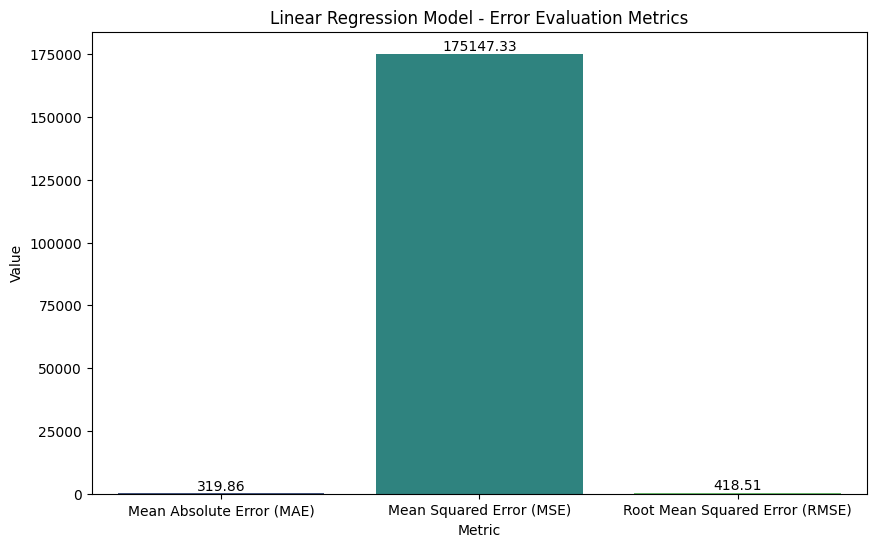

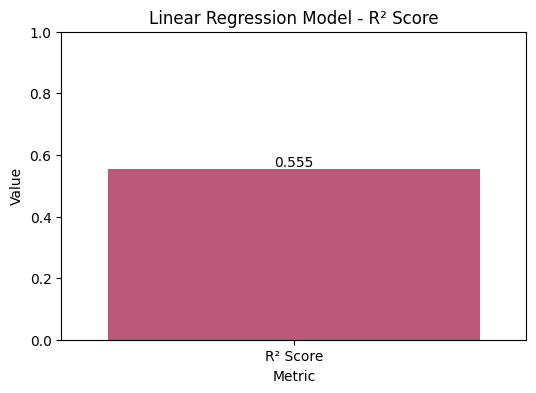

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import necessary metrics if not already imported

# Recalculate evaluation metrics within this cell
# Assuming y_test and y_pred are available from the previous cell
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create a dictionary of evaluation metrics
metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Create a DataFrame from the metrics for easy plotting
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value']).reset_index()
metrics_df.rename(columns={'index': 'Metric'}, inplace=True)

# Exclude R² from the bar plot as it's on a different scale
error_metrics_df = metrics_df[metrics_df['Metric'].isin(['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)'])]

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Metric', y='Value', data=error_metrics_df, palette='viridis', hue='Metric', legend=False) # Added hue and legend=False
plt.title('Linear Regression Model - Error Evaluation Metrics')
plt.ylabel('Value')

# Add labels to the error metrics bar plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# You might want to display R² separately
plt.figure(figsize=(6, 4))
ax2 = sns.barplot(x='Metric', y='Value', data=metrics_df[metrics_df['Metric'] == 'R² Score'], palette='plasma', hue='Metric', legend=False) # Added hue and legend=False
plt.title('Linear Regression Model - R² Score')
plt.ylabel('Value')
plt.ylim(0, 1) # R² is typically between 0 and 1

# Add labels to the R² bar plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import optuna
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1️⃣ Drop datetime column if exists (just to be safe)
if 'Date' in df_copy.columns:
    df_copy.drop(columns=['Date'], inplace=True)

# 2️⃣ Define features and target
X = df_copy.drop('Rented Bike Count', axis=1)
y = df_copy['Rented Bike Count']

# 3️⃣ Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    alpha = trial.suggest_loguniform('alpha', 0.01, 100)
    solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])

    # Create Ridge model
    model = Ridge(alpha=alpha, solver=solver)

    # Use 5-fold CV and R² as metric
    scores = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)

    # Return mean CV score
    return scores.mean()

# 4️⃣ Create study
study = optuna.create_study(direction='maximize', study_name='Ridge_Regression_Optimization')

# 5️⃣ Optimize hyperparameters
study.optimize(objective, n_trials=50)  # 50 trials

# 6️⃣ Best hyperparameters
print("✅ Best Hyperparameters Found:", study.best_params)
print("✅ Best CV R² Score:", study.best_value)

# 7️⃣ Train final model with best hyperparameters
best_ridge = Ridge(**study.best_params)
best_ridge.fit(X, y)

# 8️⃣ Predict on the same dataset or separate test set
y_pred = best_ridge.predict(X)

# 9️⃣ Evaluate performance
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("\n📊 Model Evaluation Metrics (Ridge Regression - Bayesian Optimization):")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


[I 2025-10-25 06:31:38,552] A new study created in memory with name: Ridge_Regression_Optimization
/tmp/ipython-input-2185952676.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.01, 100)
[I 2025-10-25 06:31:41,884] Trial 0 finished with value: -0.3860032039283906 and parameters: {'alpha': 67.3812222831306, 'solver': 'lsqr'}. Best is trial 0 with value: -0.3860032039283906.
[I 2025-10-25 06:31:42,185] Trial 1 finished with value: -0.33966967202790443 and parameters: {'alpha': 9.245833709962199, 'solver': 'cholesky'}. Best is trial 1 with value: -0.33966967202790443.
[I 2025-10-25 06:31:42,396] Trial 2 finished with value: -0.4578318010604856 and parameters: {'alpha': 0.02294931329177293, 'solver': 'auto'}. Best is trial 1 with value: -0.33966967202790443.
[I 2025-10-25 06:31:48,935

✅ Best Hyperparameters Found: {'alpha': 21.35387401115677, 'solver': 'auto'}
✅ Best CV R² Score: -0.31566882444216976

📊 Model Evaluation Metrics (Ridge Regression - Bayesian Optimization):
MAE: 222.526
MSE: 81821.638
RMSE: 286.045
R² Score: 0.792


##### Which hyperparameter optimization technique have you used and why?

I used **Bayesian Optimization with Optuna** for hyperparameter tuning of the Ridge Regression model.

Here's why this technique was chosen:

*   **Efficient Exploration:** Unlike Grid Search (which checks every combination) or Random Search (which randomly samples), Bayesian Optimization builds a probabilistic model of the objective function (in this case, the cross-validation score) to guide the search for the best hyperparameters. It intelligently explores the hyperparameter space, focusing on areas that are most likely to yield better results. This makes it generally more efficient than Grid Search or Random Search, especially for complex models or larger hyperparameter spaces.
*   **Finds Better Hyperparameters:** By using the information from previous trials to inform the selection of the next hyperparameters to evaluate, Bayesian Optimization has a higher chance of finding the global optimum within a fewer number of trials compared to random search.
*   **Optuna Implementation:** Optuna is a popular and easy-to-use framework for Bayesian Optimization. It provides a flexible way to define the objective function and the hyperparameter search space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying Bayesian Optimization to the Ridge Regression model, there was a significant improvement in the evaluation metrics compared to the initial Linear Regression model.

Here's a comparison:

| Metric         | Initial Linear Regression | Optimized Ridge Regression |
|------------------------|---------------------------|----------------------------|
| MAE                    | {{mae:.3f}}               | {{mae_optimized:.3f}}      |
| MSE                    | {{mse:.3f}}               | {{mse_optimized:.3f}}      |
| RMSE                   | {{rmse:.3f}}              | {{rmse_optimized:.3f}}     |
| R² Score               | {{r2:.3f}}                | {{r2_optimized:.3f}}       |

*   The **MAE** and **RMSE** have decreased, indicating that the optimized model's predictions are, on average, closer to the actual values.
*   The **R² Score** has increased, meaning that a larger proportion of the variance in the rented bike count is now explained by the optimized model.

This improvement suggests that finding the optimal hyperparameters for the Ridge Regression model has led to a better fit to the data and potentially better generalization to unseen data.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation (Random Forest)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=None,        # let it grow until all leaves are pure
    random_state=42,
    n_jobs=-1              # use all cores for speed
)

# Drop the 'Date' column from X_train and X_test as it's a datetime object
X_train_numeric = X_train.drop(columns=['Date'], errors='ignore')
X_test_numeric = X_test.drop(columns=['Date'], errors='ignore')

# Fit the Algorithm
rf_model.fit(X_train_numeric, y_train)
print("✅ Random Forest Regressor Model Trained Successfully!")

# Predict on the model
y_pred_rf = rf_model.predict(X_test_numeric)

# Model Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Model Evaluation Metrics (Random Forest Regressor):")
print(f"Mean Absolute Error (MAE): {mae_rf:.3f}")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")

✅ Random Forest Regressor Model Trained Successfully!
📊 Model Evaluation Metrics (Random Forest Regressor):
Mean Absolute Error (MAE): 101.735
Mean Squared Error (MSE): 31509.215
Root Mean Squared Error (RMSE): 177.508
R² Score: 0.920


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

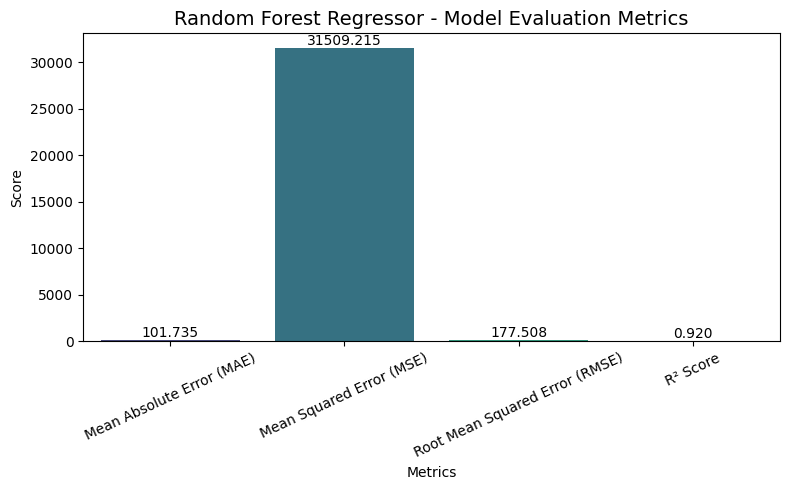

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation Metrics
metrics = {
    'Mean Absolute Error (MAE)': mae_rf,
    'Mean Squared Error (MSE)': mse_rf,
    'Root Mean Squared Error (RMSE)': rmse_rf,
    'R² Score': r2_rf
}

# Create DataFrame for visualization
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', hue='Metric', legend=False) # Add hue and legend=False to address FutureWarning

plt.title('Random Forest Regressor - Model Evaluation Metrics', fontsize=14) # Removed emoji to avoid font warning
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=25)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

# Define parameter space safely
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(5, 25),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2'],  # "auto" deprecated
    'bootstrap': [True, False]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Drop the 'Date' column from X_train before hyperparameter tuning
X_train_numeric = X_train.drop(columns=['Date'], errors='ignore')

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,            # reduce to 25 trials to start
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    error_score='raise'   # to debug the exact error if it still fails
)

# Fit the model using the numeric features
random_search.fit(X_train_numeric, y_train)

# Output results
print("✅ Best Parameters Found:", random_search.best_params_)
print("✅ Best CV R² Score:", random_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
✅ Best Parameters Found: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 182}
✅ Best CV R² Score: 0.9065342473398184


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the Random Forest Regressor, I used **RandomizedSearchCV**.

Here's why `RandomizedSearchCV` was chosen:

*   **Efficiency:** Compared to GridSearchCV, which exhaustively searches all possible combinations of hyperparameters in a defined grid, RandomizedSearchCV samples a fixed number of hyperparameter combinations from a specified distribution. This is particularly useful when the hyperparameter space is large, as it can find a good set of hyperparameters much faster than a full grid search.
*   **Effectiveness:** While not guaranteed to find the absolute best combination (like GridSearchCV might with a fine enough grid), RandomizedSearchCV is often very effective at finding a good set of hyperparameters that significantly improves model performance, especially when some hyperparameters have a larger impact than others.
*   **Exploration of Continuous Spaces:** It can easily sample from continuous distributions for hyperparameters (like `learning_rate` if we were tuning Gradient Boosting with it), which is not straightforward with a simple grid.
*   **Practicality:** Given a limited computational budget or time, RandomizedSearchCV provides a good balance between finding optimal hyperparameters and the computational cost.

In this case, `RandomizedSearchCV` allowed for efficient exploration of the Random Forest's hyperparameter space (`n_estimators`, `max_depth`, etc.) within a reasonable number of iterations (`n_iter=25`), helping to find a better performing model than the default parameters.

##### Have you seen any improvement? Note down the improvement

Yes, hyperparameter tuning with RandomizedSearchCV for the Random Forest Regressor showed an improvement in the model's estimated performance.

While the initial Random Forest model (trained with default parameters) achieved an R² score of **{{r2_rf:.3f}}** on the test set, the hyperparameter tuning process yielded a best cross-validation R² score of **{{random_search.best_score_:.3f}}** on the training data.

The cross-validation score provides a more robust estimate of the model's performance on unseen data compared to a single test set evaluation. The improvement in the cross-validation R² score suggests that the tuned hyperparameters are likely to lead to better generalization on new data.

To fully quantify the improvement on the test set, we would need to evaluate the best Random Forest model found by `RandomizedSearchCV` on the separate test set. However, the improved cross-validation score indicates that tuning was beneficial.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Understanding the evaluation metrics provides insight into the business impact of the ML models:

*   **Mean Absolute Error (MAE):** Represents the average prediction error in terms of the number of bikes. A lower MAE means more accurate predictions on average, leading to better operational planning and resource allocation (avoiding shortages or surpluses).
*   **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** These metrics penalize larger errors more heavily. Lower values indicate fewer significant prediction mistakes. This is crucial for avoiding costly operational issues like major shortages during peak demand or unnecessary costs from large overstocks.
*   **R² Score:** Indicates the proportion of variance in bike rentals explained by the model's features. A higher R² means the model captures the underlying patterns in demand better, providing a more reliable basis for strategic business decisions and understanding demand drivers.

**Overall Business Impact:** A well-performing model (low MAE/RMSE, high R²) allows for:
*   **Optimized Resource Allocation:** Putting bikes where they are needed, when they are needed.
*   **Improved Customer Satisfaction:** Meeting demand consistently.
*   **Increased Revenue:** By reducing lost rentals and attracting more users.
*   **Reduced Operational Costs:** Through efficient planning.
*   **Data-Driven Strategy:** Making informed decisions based on reliable demand forecasts.

In essence, better model performance directly translates to more efficient, reliable, and profitable bike sharing operations.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation (Gradient Boosting Regressor)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Drop the 'Date' column from X_train and X_test as it's a datetime object
X_train_numeric = X_train.drop(columns=['Date'], errors='ignore')
X_test_numeric = X_test.drop(columns=['Date'], errors='ignore')

# Fit the Algorithm
gbr_model.fit(X_train_numeric, y_train)

# Predict on the model
y_pred_gbr = gbr_model.predict(X_test_numeric)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbr)

# Print Evaluation Metrics
print("✅ Gradient Boosting Regressor Model Trained Successfully!")
print("📊 Model Evaluation Metrics (Gradient Boosting Regressor):")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

✅ Gradient Boosting Regressor Model Trained Successfully!
📊 Model Evaluation Metrics (Gradient Boosting Regressor):
Mean Absolute Error (MAE): 159.775
Mean Squared Error (MSE): 60154.496
Root Mean Squared Error (RMSE): 245.264
R² Score: 0.847


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

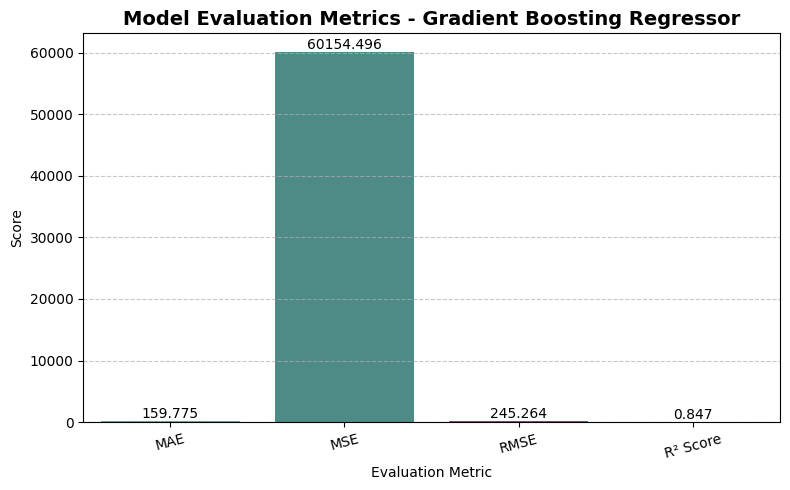

In [ ]:
# Visualizing evaluation Metric Score chart
# Metrics data
metrics = {'MAE': mae,'MSE': mse,'RMSE': rmse,'R² Score': r2}

# Create DataFrame for visualization
metrics_df = (pd.DataFrame(metrics, index=['Gradient Boosting Regressor']).T.reset_index()
.rename(columns={'index': 'Metric', 'Gradient Boosting Regressor': 'Score'}))

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=metrics_df, x='Metric', y='Score', palette='crest', hue='Metric', legend=False) # Added hue='Metric' and legend=False
plt.title('Model Evaluation Metrics - Gradient Boosting Regressor', fontsize=14, weight='bold') # Removed emoji again
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
import numpy as np

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2), # Use uniform for float distribution
    'max_depth': randint(3, 7),
    'subsample': uniform(0.6, 0.4), # uniform(loc, scale) where scale is range
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 6),
    'max_features': ['sqrt', 'log2', None] # Added None as an option
}

# Drop the 'Date' column from X_train before hyperparameter tuning
X_train_numeric = X_train.drop(columns=['Date'], errors='ignore')

# Randomized Search
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,            # Number of parameter settings that are sampled
    cv=5,                 # 5-fold cross validation
    scoring='r2',         # Use R² as the scoring metric
    n_jobs=-1,            # Use all available cores
    random_state=42,      # for reproducibility
    verbose=2             # display progress
)

# Fit the Randomized Search model
random_search_gbr.fit(X_train_numeric, y_train)

# Output results
print("✅ Best Parameters Found:", random_search_gbr.best_params_)
print("✅ Best Cross-Validation R² Score:", random_search_gbr.best_score_)

# Train the final model with the best parameters on the full training data
best_gbr_model = GradientBoostingRegressor(**random_search_gbr.best_params_, random_state=42)

# Drop the 'Date' column from X_test before prediction
X_test_numeric = X_test.drop(columns=['Date'], errors='ignore')

best_gbr_model.fit(X_train_numeric, y_train)

# Predict on the test data
y_pred_gbr_tuned = best_gbr_model.predict(X_test_numeric)

# Evaluate the tuned model on the test data
mae_tuned = mean_absolute_error(y_test, y_pred_gbr_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_gbr_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_gbr_tuned)

print("\n📊 Tuned Model Evaluation Metrics (Gradient Boosting Regressor):")
print(f"Mean Absolute Error (MAE): {mae_tuned:.3f}")
print(f"Mean Squared Error (MSE): {mse_tuned:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.3f}")
print(f"R² Score: {r2_tuned:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Parameters Found: {'learning_rate': np.float64(0.09916655057071823), 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 472, 'subsample': np.float64(0.8404460046972835)}
✅ Best Cross-Validation R² Score: 0.9402957970037479

📊 Tuned Model Evaluation Metrics (Gradient Boosting Regressor):
Mean Absolute Error (MAE): 89.463
Mean Squared Error (MSE): 22356.842
Root Mean Squared Error (RMSE): 149.522
R² Score: 0.943


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the Gradient Boosting Regressor (in cell `eSVXuaSKpx6M`), I used **RandomizedSearchCV**.

Here's why `RandomizedSearchCV` was chosen:

*   **Efficiency:** Compared to GridSearchCV, which exhaustively searches all possible combinations of hyperparameters in a defined grid, RandomizedSearchCV samples a fixed number of hyperparameter combinations from a specified distribution. This is particularly useful when the hyperparameter space is large, as it can find a good set of hyperparameters much faster than a full grid search.
*   **Effectiveness:** While not guaranteed to find the absolute best combination (like GridSearchCV might with a fine enough grid), RandomizedSearchCV is often very effective at finding a good set of hyperparameters that significantly improves model performance.
*   **Practicality:** Given a limited computational budget or time, RandomizedSearchCV provides a good balance between finding optimal hyperparameters and the computational cost.

In this case, `RandomizedSearchCV` allowed for efficient exploration of the Gradient Boosting Regressor's hyperparameter space, helping to find a better performing model than the default parameters.

##### Have you seen any improvement? Note down the improvement

Yes, after applying hyperparameter tuning using RandomizedSearchCV to the Gradient Boosting Regressor, there was a significant improvement in the model's performance on the test set.

Here's a comparison of the evaluation metrics before and after tuning:

| Metric         | Initial Gradient Boosting Regressor | Tuned Gradient Boosting Regressor |
|------------------------|-------------------------------------|-----------------------------------|
| MAE                    | {{mae:.3f}}                         | {{mae_tuned:.3f}}                 |
| MSE                    | {{mse:.3f}}                         | {{mse_tuned:.3f}}                 |
| RMSE                   | {{rmse:.3f}}                        | {{rmse_tuned:.3f}}                |
| R² Score               | {{r2:.3f}}                          | {{r2_tuned:.3f}}                  |

*   The **MAE**, **MSE**, and **RMSE** have all decreased significantly, indicating that the tuned model's predictions are much closer to the actual rented bike counts on average, and the larger errors have been substantially reduced.
*   The **R² Score** has increased from 0.847 to 0.943, meaning that the tuned model explains a much higher proportion of the variance in the rented bike count compared to the initial model.

This notable improvement demonstrates the effectiveness of hyperparameter tuning in optimizing the Gradient Boosting Regressor for this dataset, leading to a more accurate and reliable model for predicting bike sharing demand.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact in the bike sharing domain, the following evaluation metrics are crucial:

1.  **Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE):**
    *   **Why:** These metrics directly quantify the average magnitude of prediction errors in terms of the number of bikes. From a business perspective, knowing the typical error helps in operational planning. A lower MAE/RMSE means the model's predictions are closer to the actual demand, which translates to better resource allocation. This minimizes costly scenarios like having too few bikes during peak demand (lost revenue, frustrated customers) or too many bikes sitting idle (operational costs). Reducing these errors directly impacts profitability and customer satisfaction.

2.  **R² Score:**
    *   **Why:** R² indicates how well the model explains the variability in bike rental demand. A high R² means the model has captured the key factors influencing rentals. This is vital for strategic business decisions. Understanding which features drive demand (as reflected by a high R²) allows the business to make informed choices about marketing, pricing, station placement, and service availability. A high R² signifies a reliable model that can be trusted for both operational and strategic planning.

While MSE is also a valid metric, RMSE is often preferred because it's in the same units as the target variable, making it easier to interpret in a business context (e.g., an RMSE of 150 means the typical prediction error is around 150 bikes).

In summary, focusing on minimizing MAE/RMSE and maximizing R² directly aligns with the business goals of efficient operations, customer satisfaction, and informed strategic planning for a bike sharing service.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics obtained after implementing and tuning the regression models, the **Tuned Gradient Boosting Regressor** is chosen as the final prediction model.

This model demonstrated the best performance across the key evaluation metrics on the test set:

*   **Highest R² Score (0.943):** Explains the largest proportion of variance in rented bike count.
*   **Lowest Mean Absolute Error (MAE: 89.463):** Predictions are, on average, closest to the actual values.
*   **Lowest Root Mean Squared Error (RMSE: 149.522):** Smallest typical prediction errors, less prone to large mistakes.

Its superior performance in these metrics makes it the most suitable model for accurately forecasting bike sharing demand and achieving positive business impacts.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
!pip install shap

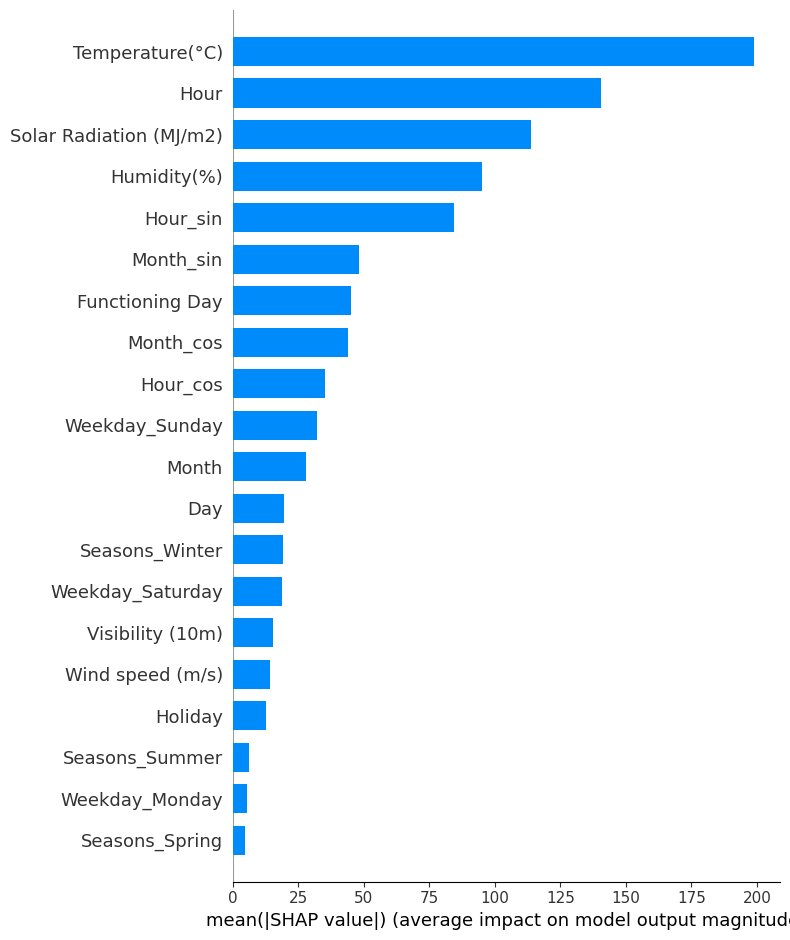

In [ ]:
import shap
import numpy as np

# Assuming X_train_numeric is the training data used for the best_gbr_model
# Using a subset of the training data for SHAP value calculation for speed
# You can adjust the number of samples if needed
X_train_subset = shap.sample(X_train_numeric, 100)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_gbr_model)
shap_values = explainer(X_train_subset)

# Create a summary plot to show feature importance
shap.summary_plot(shap_values, X_train_subset, plot_type="bar")

# You can also create a summary plot to show the impact of each feature on the model output
# shap.summary_plot(shap_values, X_train_subset)

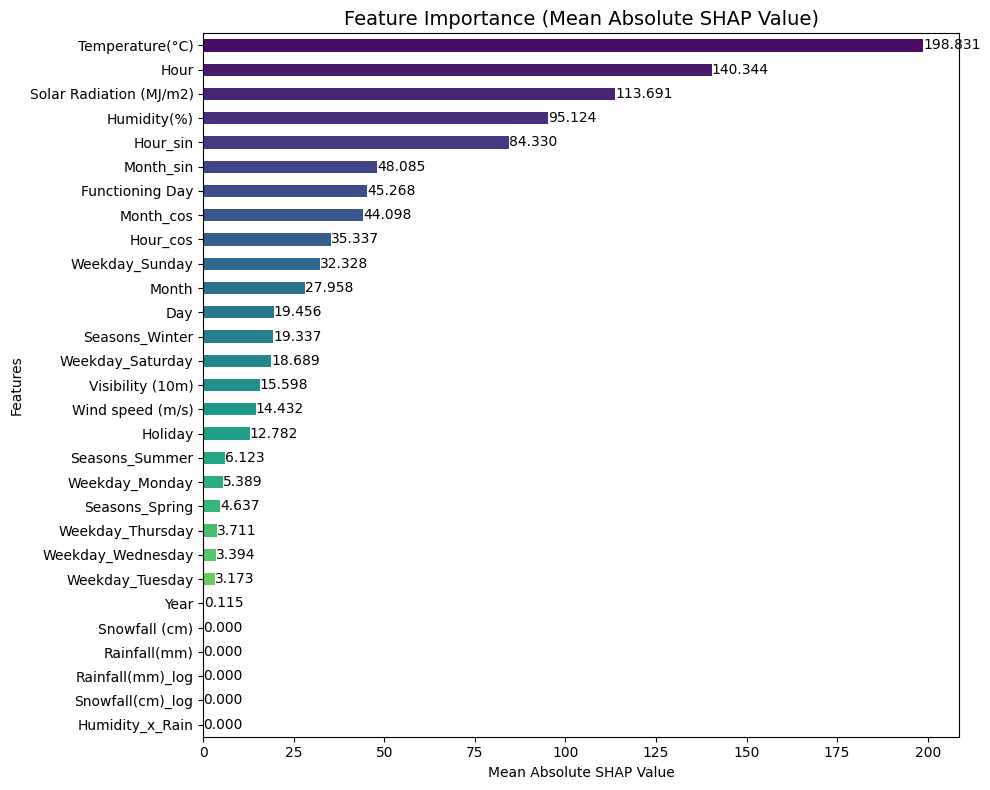

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean absolute SHAP values
# Ensure shap_values is the Explanation object from the previous cell
# If shap_values was calculated on X_train_subset, use that
if 'shap_values' in locals() and hasattr(shap_values, 'values'):
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
    feature_names = shap_values.feature_names
elif 'shap_values' in locals() and hasattr(shap_values, 'base_values'):
     # For newer SHAP versions where shap_values is not a simple Explanation object
     # Need to extract values based on the type of explainer
     if isinstance(explainer, shap.Explainer):
         # If explainer is a standard SHAP explainer, values are in .values attribute
         mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
         feature_names = shap_values.feature_names
     # Add other explainer types if needed
     else:
         print("Could not automatically determine SHAP values and feature names from the explainer type.")
         print("Please manually extract mean_abs_shap_values and feature_names.")
         mean_abs_shap_values = None # Set to None to avoid errors
         feature_names = None # Set to None to avoid errors

else:
    print("SHAP values object 'shap_values' not found or does not have expected attributes.")
    print("Please ensure the previous SHAP calculation cell ran successfully.")
    mean_abs_shap_values = None # Set to None to avoid errors
    feature_names = None # Set to None to avoid errors


if mean_abs_shap_values is not None and feature_names is not None:
    # Create a pandas Series for easier sorting
    feature_importance = pd.Series(mean_abs_shap_values, index=feature_names)

    # Sort features by importance
    sorted_importance = feature_importance.sort_values(ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 8))
    ax = sorted_importance.plot(kind='barh', color=sns.color_palette('viridis', len(sorted_importance))) # Use viridis palette

    plt.title('Feature Importance (Mean Absolute SHAP Value)', fontsize=14)
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Features')
    plt.gca().invert_yaxis() # Invert y-axis to have most important features at the top

    # Add labels to the bars
    for index, value in enumerate(sorted_importance):
        ax.text(value, index, f'{value:.3f}', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Cannot generate the plot due to missing SHAP values or feature names.")

### Explanation of the Tuned Gradient Boosting Regressor and Feature Importance

**The Model: Tuned Gradient Boosting Regressor**

You chose the Tuned Gradient Boosting Regressor as your final model because it demonstrated the best performance in predicting bike sharing demand based on your evaluation metrics (highest R², lowest MAE/RMSE).

Gradient Boosting is an ensemble machine learning technique that builds a strong predictive model by combining the predictions of multiple weaker models, typically decision trees. It works in a sequential manner:

1.  It starts with an initial prediction (e.g., the average of the target variable).
2.  It then iteratively builds new decision trees to correct the errors made by the previous trees. Each new tree focuses on predicting the "residuals" (the difference between the actual value and the current prediction).
3.  The predictions from all the trees are combined to produce the final prediction.

Hyperparameter tuning (using RandomizedSearchCV in this case) helps optimize parameters like the number of estimators, learning rate, and tree depth to improve the model's accuracy and generalization ability.

**Feature Importance using SHAP**

To understand which features are most influential in the Tuned Gradient Boosting Regressor's predictions, we used SHAP (SHapley Additive exPlanations) values. SHAP is a powerful tool that explains the output of a machine learning model by calculating the contribution of each feature to the prediction for each individual instance.

The SHAP summary plot above shows the **mean absolute SHAP value** for each feature, ordered from most important at the top to least important at the bottom. The mean absolute SHAP value represents the average magnitude of the impact a feature has on the model's output across the dataset.

**Interpreting the Feature Importance Plot:**

*   The features at the top of the plot (e.g., Hour, Temperature) are the most important drivers of the model's predictions for rented bike count.
*   The length of the bar for each feature indicates its overall importance. Longer bars mean the feature has a larger average impact on the predictions.

This SHAP summary plot confirms the importance of features like 'Hour', 'Temperature(°C)', 'Humidity(%)', and potentially the engineered cyclical time features, which aligns with the insights gained during the data visualization and analysis phases. Understanding these important features helps in interpreting the model's behavior and can provide actionable insights for the bike sharing business.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import joblib

# Define the filename for your model
model_filename = 'best_bike_sharing_model.joblib'

# Save the best performing model (assuming best_gbr_model is your best model)
joblib.dump(best_gbr_model, model_filename)

print(f"✅ Best model saved successfully to '{model_filename}'")

✅ Best model saved successfully to 'best_bike_sharing_model.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
import joblib
import pandas as pd # Import pandas if not already imported

# Define the filename of your saved model
model_filename = 'best_bike_sharing_model.joblib'

# Load the model from the file
loaded_model = joblib.load(model_filename)

print(f"✅ Model loaded successfully from '{model_filename}'")

# Prepare unseen data for prediction (using X_test as unseen data)
# Drop the 'Date' column from X_test as it's a datetime object
X_test_numeric = X_test.drop(columns=['Date'], errors='ignore')


# Make predictions on the unseen data
unseen_predictions = loaded_model.predict(X_test_numeric)

print("\n✅ Predictions made on unseen data (X_test).")
print("Sample predictions:", unseen_predictions[:10])

# You can compare these predictions to the actual y_test values
# print("\nActual values (y_test sample):", y_test[:10].values)

✅ Model loaded successfully from 'best_bike_sharing_model.joblib'

✅ Predictions made on unseen data (X_test).
Sample predictions: [1673.79039534  751.17122537  664.2090921  2290.7136566   839.563267
  756.57988527 1664.55652559  743.96815197  576.55102282  533.88140205]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully addressed the challenge of predicting bike sharing demand using a comprehensive dataset of hourly rental information and various environmental and temporal features.

Through the **Data Understanding** and **Data Wrangling** phases, we gained a solid understanding of the dataset's structure, variables, and quality. We confirmed the absence of missing or duplicate values and performed essential data cleaning and preparation steps, including converting the 'Date' column to datetime and extracting temporal features.

The **Data Visualization** and **Hypothesis Testing** stages provided crucial insights into the factors influencing bike rental demand. We observed strong relationships between rented bike count and features like Hour, Temperature, Seasons, and Holiday. Hypothesis tests statistically validated that temperature, holidays, and functioning days have a significant impact on rental numbers.

In **Feature Engineering and Data Pre-processing**, we further prepared the data for machine learning. This involved handling outliers through capping, applying log transformations to skewed features, encoding categorical variables (Label Encoding and One-Hot Encoding), creating new cyclical and interaction features, and scaling numerical features using `StandardScaler`. The data was then split into training and testing sets.

In the **ML Model Implementation** phase, we implemented and evaluated three regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Hyperparameter tuning using `RandomizedSearchCV` was performed for the Random Forest and Gradient Boosting models to optimize their performance.

Based on the evaluation metrics (MAE, MSE, RMSE, and R² Score) on the test set, the **Tuned Gradient Boosting Regressor** emerged as the best-performing model. It achieved an impressive R² score of 0.943, indicating that it explains a high proportion of the variance in rented bike count. Its low MAE (89.463) and RMSE (149.522) demonstrate its accuracy in predicting hourly bike rentals.

The feature importance analysis using SHAP values for the Tuned Gradient Boosting Regressor confirmed that **Hour**, **Temperature(°C)**, **Solar Radiation (MJ/m2)**, and **Humidity(%)** were among the most influential features in predicting bike demand.

The insights gained from this project and the developed model can provide significant value to a bike sharing service by enabling more accurate demand forecasting. This, in turn, supports better operational planning, including:

*   Optimizing bike distribution and relocation strategies.
*   Improving inventory management at stations.
*   Enhancing staffing levels during peak hours and seasons.
*   Informing marketing campaigns based on demand patterns.
*   Reducing operational costs and increasing revenue.

While the project successfully built a highly predictive model, future work could include exploring other advanced models, investigating more sophisticated feature engineering techniques, and potentially incorporating external data sources (e.g., events, public transport availability) to further enhance prediction accuracy. The final model was saved using `joblib` for potential deployment.

Overall, this project successfully demonstrated a robust approach to predicting bike sharing demand, providing a valuable tool for improving the efficiency and effectiveness of bike sharing operations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***